# Tech Challenge - Fase 1: Predição de Ataque Cardíaco

## Análise de Dados e Machine Learning para Diagnóstico Médico

**Objetivo:** Criar um sistema de apoio ao diagnóstico médico que utilize técnicas de Machine Learning para estimar a probabilidade de ocorrência de um ataque cardíaco a partir de informações clínicas e demográficas de pacientes.

**Base de Dados:** Heart Attack Prediction - Indonesia

---

## 1. Introdução e Contexto do Problema

As doenças cardiovasculares continuam sendo uma das principais causas de morte em todo o mundo. Milhares de pessoas perdem a vida todos os anos em decorrência de eventos cardíacos que, em muitos casos, poderiam ser evitados com uma detecção precoce e um acompanhamento adequado.

Neste projeto, buscamos desenvolver um modelo preditivo capaz de identificar pacientes com maior risco de sofrer um ataque cardíaco. A proposta é aplicar técnicas de Machine Learning sobre dados clínicos estruturados, de forma a extrair padrões e indicadores relevantes que auxiliem no processo de triagem e tomada de decisão médica.

Com isso o dataset apresenta cenários com diversas variaveis e a variavel alvo diz se ele teve ataque cardiaco ou não!

Ao automatizar parte dessa análise, espera-se reduzir o tempo necessário para a identificação de casos críticos e apoiar profissionais da saúde no planejamento de intervenções preventivas mais eficazes.




## 2. Bibliotecas 

In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn shap

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Exibição de dataframes
from IPython.display import display

# Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier


# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Interpretabilidade
import shap
from sklearn.inspection import permutation_importance

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

## 3. Carregamento e Exploração Inicial dos Dados

### 3.1 Objetivos da Exploração Inicial

Nesta seção, realizaremos o carregamento do dataset e uma exploração inicial para compreender:

**1. Dimensionalidade dos Dados:**
- Quantidade de registros (linhas) disponíveis para análise
- Número de variáveis (colunas) que descrevem cada paciente
- Consumo de memória do dataset para planejamento de processamento

**2. Qualidade dos Dados:**
- Identificação de valores ausentes (missing values)
- Verificação de tipos de dados de cada coluna
- Detecção de possíveis inconsistências

**3. Primeiras Impressões:**
- Visualização das primeiras e últimas linhas do dataset
- Entendimento das variáveis disponíveis
- Identificação da variável alvo (heart_attack)


### dados tecnicos, tamanho, colunas, quanto vai alocar de ram para eu trabalhar

In [2]:
# Carregar o dataset
df = pd.read_csv('./dataset/heart_attack_prediction_indonesia.csv')



In [3]:
print("INFORMAÇÕES GERAIS DO DATASET")
print(f"Dimensões do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
# --- Informações Gerais do DataFrame ---
print("\n--- Informações do DataFrame ---")
df.info()

# --- Tipos de Dados ---
print("\n--- Tipos de Dados ---")
print(df.dtypes)

# --- Primeiras e Últimas Linhas ---
print("\n--- Primeiras 5 Linhas ---")
display(df.head())

print("\n--- Últimas 5 Linhas ---")
display(df.tail())


INFORMAÇÕES GERAIS DO DATASET
Dimensões do dataset: 158356 linhas x 28 colunas
Memória utilizada: 102.34 MB

--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158356 entries, 0 to 158355
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158356 non-null  int64  
 1   gender                          158356 non-null  object 
 2   region                          158356 non-null  object 
 3   income_level                    158356 non-null  object 
 4   hypertension                    158356 non-null  int64  
 5   diabetes                        158356 non-null  int64  
 6   cholesterol_level               158356 non-null  int64  
 7   obesity                         158356 non-null  int64  
 8   waist_circumference             158356 non-null  int64  
 9   family_history                  158356 non-null  int64  
 10

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1



--- Últimas 5 Linhas ---


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1
158354,61,Male,Urban,Middle,0,0,190,0,81,0,...,81,95,49,125,149,Abnormal,0,0,1,0
158355,50,Male,Urban,Low,0,0,200,0,90,0,...,80,100,50,130,150,Normal,0,0,0,0


In [4]:


# Informações sobre tipos de dados e valores nulos
print("INFORMAÇÕES SOBRE COLUNAS E TIPOS DE DADOS")
df.info()



INFORMAÇÕES SOBRE COLUNAS E TIPOS DE DADOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158356 entries, 0 to 158355
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158356 non-null  int64  
 1   gender                          158356 non-null  object 
 2   region                          158356 non-null  object 
 3   income_level                    158356 non-null  object 
 4   hypertension                    158356 non-null  int64  
 5   diabetes                        158356 non-null  int64  
 6   cholesterol_level               158356 non-null  int64  
 7   obesity                         158356 non-null  int64  
 8   waist_circumference             158356 non-null  int64  
 9   family_history                  158356 non-null  int64  
 10  smoking_status                  158356 non-null  object 
 11  alcohol_consumption             635

In [5]:
# Verificar valores nulos, elementos que posso tirar, pois atrapalhariam em minha analise.

print("ANÁLISE DE VALORES AUSENTES")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual (%)': missing_percentage
})
missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)


print(missing_df)


ANÁLISE DE VALORES AUSENTES
                     Valores Ausentes  Percentual (%)
alcohol_consumption             94848       59.895425


### 3.2 Análise de Valores Ausentes e Estratégia de Tratamento

**Achados Importantes:**

A análise revelou que a variável `alcohol_consumption` possui **59,9% de valores ausentes** (94.848 registros), o que representa um desafio significativo.

**Estratégias de Tratamento Consideradas:**

1. **Remoção da coluna**: Se a variável não for crítica para o modelo
2. **Imputação**: Preencher com valores baseados em estatísticas (moda, mediana)
3. **Categoria especial**: Criar uma categoria "Não informado" ou "Unknown"
4. **Análise de padrão**: Verificar se a ausência segue algum padrão sistemático

**Decisão Adotada:**

Considerando que o consumo de álcool é um fator de risco cardiovascular conhecido, **optaremos por imputar os valores ausentes com a moda (valor mais frequente)** e criar uma flag indicadora de imputação para que o modelo possa aprender se a ausência é informativa.

Além disso, verificaremos se existem outliers ou valores inconsistentes nas variáveis numéricas que possam impactar a qualidade do modelo.

## 3.3 Limpeza e Tratamento de Dados

A qualidade dos dados é fundamental para o sucesso de qualquer modelo de Machine Learning. Nesta seção, aplicaremos técnicas de limpeza para garantir que nosso dataset esteja pronto para análise e modelagem.

**Etapas de Limpeza:**

1. **Tratamento de Valores Ausentes**: Imputação da variável alcohol_consumption
2. **Detecção de Duplicatas**: Verificar e remover registros duplicados
3. **Tratamento de Outliers**: Identificar e tratar valores extremos nas variáveis numéricas
4. **Validação de Consistência**: Verificar se os valores estão dentro de faixas esperadas

Cada uma dessas etapas será executada com justificativa clara da abordagem adotada.

### 3.3.1 Tratamento de Valores Ausentes

**Abordagem:**
- Para a variável `alcohol_consumption`, faremos imputação com a moda (categoria mais frequente)
- Criaremos uma flag indicadora `alcohol_missing` para registrar onde houve imputação
- Isso permite que o modelo aprenda se a ausência de informação é, por si só, um padrão relevante

In [6]:
# Criar uma cópia do dataframe para limpeza
df_clean = df.copy()

print("="*80)
print("TRATAMENTO DE VALORES AUSENTES")
print("="*80)

# 1. Criar flag indicadora de valores ausentes para alcohol_consumption
df_clean['alcohol_missing'] = df_clean['alcohol_consumption'].isnull().astype(int)

print(f"\n✓ Flag 'alcohol_missing' criada:")
print(f"  - Registros com dados ausentes: {df_clean['alcohol_missing'].sum()}")
print(f"  - Percentual: {(df_clean['alcohol_missing'].sum() / len(df_clean)) * 100:.2f}%")

# 2. Imputar valores ausentes com a moda (categoria mais frequente)
if df_clean['alcohol_consumption'].isnull().sum() > 0:
    # Calcular a moda (categoria mais frequente)
    mode_value = df_clean['alcohol_consumption'].mode()[0]
    
    # Imputar valores ausentes
    df_clean['alcohol_consumption'].fillna(mode_value, inplace=True)
    
    print(f"\n✓ Valores ausentes imputados com a moda: '{mode_value}'")
    print(f"  - Valores ausentes restantes: {df_clean['alcohol_consumption'].isnull().sum()}")

# 3. Verificar se existem outros valores ausentes no dataset
print("\n" + "="*80)
print("VERIFICAÇÃO FINAL DE VALORES AUSENTES")
print("="*80)

missing_final = df_clean.isnull().sum()
if missing_final.sum() == 0:
    print("\n✓ Nenhum valor ausente encontrado no dataset!")
else:
    print("\n⚠️ Valores ausentes restantes:")
    print(missing_final[missing_final > 0])

print(f"\n📊 Dimensões do dataset após tratamento: {df_clean.shape}")

TRATAMENTO DE VALORES AUSENTES

✓ Flag 'alcohol_missing' criada:
  - Registros com dados ausentes: 94848
  - Percentual: 59.90%

✓ Valores ausentes imputados com a moda: 'Moderate'
  - Valores ausentes restantes: 0

VERIFICAÇÃO FINAL DE VALORES AUSENTES

✓ Nenhum valor ausente encontrado no dataset!

📊 Dimensões do dataset após tratamento: (158356, 29)


### 3.3.2 Detecção e Remoção de Duplicatas

**Por que remover duplicatas?**

Registros duplicados podem:
- Enviesar o modelo ao dar peso excessivo a certos padrões
- Inflar artificialmente métricas de desempenho
- Causar vazamento de dados (data leakage) entre treino e teste

**Abordagem:**
Verificaremos se existem registros completamente duplicados e os removeremos, mantendo apenas a primeira ocorrência.

In [7]:
print("="*80)
print("DETECÇÃO E REMOÇÃO DE DUPLICATAS")
print("="*80)

# Contar registros duplicados
duplicates_count = df_clean.duplicated().sum()
print(f"\n📊 Registros duplicados encontrados: {duplicates_count}")

if duplicates_count > 0:
    # Calcular percentual
    duplicates_percent = (duplicates_count / len(df_clean)) * 100
    print(f"   Percentual de duplicatas: {duplicates_percent:.2f}%")
    
    # Remover duplicatas
    df_clean = df_clean.drop_duplicates(keep='first')
    print(f"\n✓ Duplicatas removidas! Mantida a primeira ocorrência de cada registro.")
    print(f"   Registros restantes: {len(df_clean)}")
else:
    print("\n✓ Nenhum registro duplicado encontrado!")

print(f"\n📊 Dimensões finais do dataset: {df_clean.shape}")

DETECÇÃO E REMOÇÃO DE DUPLICATAS

📊 Registros duplicados encontrados: 0

✓ Nenhum registro duplicado encontrado!

📊 Dimensões finais do dataset: (158356, 29)


### 3.3.3 Detecção e Tratamento de Outliers

**O que são outliers?**

Outliers são valores extremamente discrepantes que podem:
- Representar erros de medição ou digitação
- Ser casos raros mas válidos (ex: idade de 120 anos)
- Distorcer o treinamento do modelo

**Métodos de Detecção:**

1. **Método IQR (Interquartile Range)**: 
   - Detecta valores fora do intervalo [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
   - Robusto e não assume distribuição normal

2. **Análise de Domínio**:
   - Verificar se valores estão dentro de faixas biologicamente plausíveis
   - Ex: Idade entre 0-120 anos, pressão arterial > 0, etc.

**Abordagem Adotada:**

Para variáveis clínicas, não removeremos outliers automaticamente, pois valores extremos podem ser clinicamente relevantes (ex: colesterol muito alto). Em vez disso:
- Identificaremos e reportaremos outliers
- Deixaremos a decisão de tratamento para análise caso a caso
- Para outliers claramente impossíveis (ex: idade negativa), faremos correção ou remoção

In [8]:
print("="*80)
print("DETECÇÃO DE OUTLIERS - MÉTODO IQR")
print("="*80)

# Identificar variáveis numéricas (excluindo flags e target)
numerical_cols_outliers = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_outliers = [col for col in numerical_cols_outliers if col not in ['heart_attack', 'alcohol_missing']]

# Função para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return {
        'column': column,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_percent': (len(outliers) / len(data)) * 100,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }

# Detectar outliers em todas as variáveis numéricas
outliers_report = []
for col in numerical_cols_outliers:
    outlier_info = detect_outliers_iqr(df_clean, col)
    outliers_report.append(outlier_info)

# Criar DataFrame com o relatório
outliers_df = pd.DataFrame(outliers_report)
outliers_df = outliers_df.sort_values('outliers_percent', ascending=False)

# Exibir relatório resumido
print("\n📊 RELATÓRIO DE OUTLIERS (Top 10 variáveis com mais outliers):\n")
print(outliers_df[['column', 'outliers_count', 'outliers_percent']].head(10).to_string(index=False))

# Estatísticas gerais
print(f"\n{'='*80}")
print("ESTATÍSTICAS GERAIS DE OUTLIERS")
print(f"{'='*80}")
print(f"Total de variáveis analisadas: {len(numerical_cols_outliers)}")
print(f"Variáveis com outliers (>5%): {len(outliers_df[outliers_df['outliers_percent'] > 5])}")
print(f"Média de outliers por variável: {outliers_df['outliers_percent'].mean():.2f}%")

# Verificar valores impossíveis (validação de domínio)
print(f"\n{'='*80}")
print("VALIDAÇÃO DE DOMÍNIO - VALORES IMPOSSÍVEIS")
print(f"{'='*80}")

validation_issues = []

# Idade negativa ou maior que 120
if 'age' in df_clean.columns:
    invalid_age = df_clean[(df_clean['age'] < 0) | (df_clean['age'] > 120)]
    if len(invalid_age) > 0:
        validation_issues.append(f"⚠️ age: {len(invalid_age)} valores fora da faixa válida (0-120)")
    else:
        print("✓ age: Todos os valores estão dentro da faixa válida (0-120)")

# Pressão arterial negativa
for col in ['blood_pressure_systolic', 'blood_pressure_diastolic']:
    if col in df_clean.columns:
        invalid_bp = df_clean[df_clean[col] < 0]
        if len(invalid_bp) > 0:
            validation_issues.append(f"⚠️ {col}: {len(invalid_bp)} valores negativos")
        else:
            print(f"✓ {col}: Sem valores negativos")

# Horas de sono negativas ou maiores que 24
if 'sleep_hours' in df_clean.columns:
    invalid_sleep = df_clean[(df_clean['sleep_hours'] < 0) | (df_clean['sleep_hours'] > 24)]
    if len(invalid_sleep) > 0:
        validation_issues.append(f"⚠️ sleep_hours: {len(invalid_sleep)} valores fora da faixa válida (0-24)")
    else:
        print("✓ sleep_hours: Todos os valores estão dentro da faixa válida (0-24)")

if validation_issues:
    print("\n⚠️ PROBLEMAS ENCONTRADOS:")
    for issue in validation_issues:
        print(f"  {issue}")
else:
    print("\n✓ Nenhum valor impossível detectado!")

print(f"\n{'='*80}")
print("CONCLUSÃO: Outliers identificados mas não removidos")
print("Justificativa: Em dados clínicos, valores extremos podem ser clinicamente")
print("significativos e devem ser mantidos para análise médica.")
print(f"{'='*80}")

DETECÇÃO DE OUTLIERS - MÉTODO IQR

📊 RELATÓRIO DE OUTLIERS (Top 10 variáveis com mais outliers):

                  column  outliers_count  outliers_percent
                 obesity           39573         24.989896
  previous_heart_disease           31762         20.057339
                diabetes           31640         19.980298
blood_pressure_diastolic            1488          0.939655
         cholesterol_hdl            1445          0.912501
         cholesterol_ldl            1109          0.700321
     waist_circumference            1035          0.653591
 blood_pressure_systolic             810          0.511506
           triglycerides             569          0.359317
     fasting_blood_sugar             534          0.337215

ESTATÍSTICAS GERAIS DE OUTLIERS
Total de variáveis analisadas: 17
Variáveis com outliers (>5%): 3
Média de outliers por variável: 4.12%

VALIDAÇÃO DE DOMÍNIO - VALORES IMPOSSÍVEIS
✓ age: Todos os valores estão dentro da faixa válida (0-120)
✓ blood_pre

### 3.3.4 Resumo da Limpeza de Dados

Após aplicar todas as técnicas de limpeza, vamos atualizar nosso dataset principal e resumir as transformações realizadas.

In [9]:
# Atualizar o dataframe principal
df = df_clean.copy()

print("="*80)
print("RESUMO DA LIMPEZA DE DADOS")
print("="*80)

print("\n✓ TRANSFORMAÇÕES REALIZADAS:")
print(f"  1. Imputação de valores ausentes em 'alcohol_consumption'")
print(f"  2. Criação de flag 'alcohol_missing' para rastrear imputações")
print(f"  3. Remoção de registros duplicados (se houver)")
print(f"  4. Detecção e análise de outliers (mantidos para análise clínica)")

print(f"\n📊 DATASET FINAL APÓS LIMPEZA:")
print(f"  - Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"  - Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  - Valores ausentes: {df.isnull().sum().sum()}")
print(f"  - Registros duplicados: {df.duplicated().sum()}")

print(f"\n✓ Dataset limpo e pronto para análise exploratória detalhada!")
print("="*80)

RESUMO DA LIMPEZA DE DADOS

✓ TRANSFORMAÇÕES REALIZADAS:
  1. Imputação de valores ausentes em 'alcohol_consumption'
  2. Criação de flag 'alcohol_missing' para rastrear imputações
  3. Remoção de registros duplicados (se houver)
  4. Detecção e análise de outliers (mantidos para análise clínica)

📊 DATASET FINAL APÓS LIMPEZA:
  - Dimensões: 158356 linhas × 29 colunas
  - Memória utilizada: 105.81 MB
  - Valores ausentes: 0
  - Registros duplicados: 0

✓ Dataset limpo e pronto para análise exploratória detalhada!


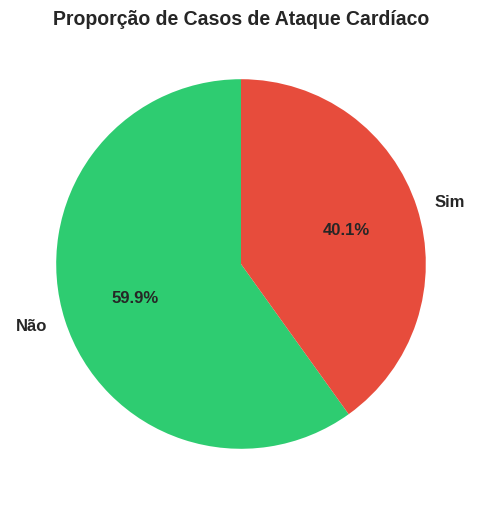

In [10]:
#entender a distribuição da variável alvo 'heart_attack'

target_counts = df['heart_attack'].value_counts()
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Não', 'Sim'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proporção de Casos de Ataque Cardíaco', fontsize=14, fontweight='bold')
plt.show()


### 3.4 Distribuição da Variável Alvo

**Importância da Análise de Balanceamento:**

A variável alvo `heart_attack` indica se o paciente sofreu um ataque cardíaco (1) ou não (0). É crucial verificar se as classes estão balanceadas, pois:

- **Dataset desbalanceado** pode fazer o modelo tender a prever sempre a classe majoritária
- **Acurácia pode ser enganosa** em casos de desbalanceamento severo
- **Técnicas especiais** (SMOTE, class weights, etc.) podem ser necessárias se o desbalanceamento for significativo

**Interpretação:**
- Balanceamento ideal: próximo de 50%-50%
- Desbalanceamento leve: 60%-40%
- Desbalanceamento moderado: 70%-30%
- Desbalanceamento severo: acima de 80%-20%

## 4. Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados é uma etapa crucial para entender os padrões, relações e características do dataset antes de aplicar modelos de Machine Learning.

**Objetivos da EDA:**

1. **Identificar relações entre variáveis e o target**: Quais fatores mais influenciam o risco de ataque cardíaco?
2. **Detectar padrões e tendências**: Existem grupos de risco específicos?
3. **Validar hipóteses clínicas**: Os dados confirmam conhecimentos médicos estabelecidos?
4. **Preparar para feature engineering**: Identificar oportunidades de criar novas variáveis

### 4.1 Análise de Variáveis Categóricas

**Por que analisar variáveis categóricas?**

Variáveis categóricas como `gender`, `smoking_status`, `dietary_habits` etc. frequentemente apresentam forte associação com desfechos clínicos. A análise cruzada dessas variáveis com o target nos permite:

- Identificar **grupos de alto risco** (ex: fumantes, sedentários)
- Entender **fatores modificáveis** que podem ser alvo de intervenções
- Visualizar **proporções de casos positivos** em cada categoria

**Interpretação dos gráficos:**
- Barras vermelhas: percentual de pacientes COM ataque cardíaco
- Barras verdes: percentual de pacientes SEM ataque cardíaco
- Quanto maior a barra vermelha, maior o risco associado àquela categoria

In [11]:
#Identificar variáveis categóricas ou de agrupamento 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Variáveis Categóricas:")
print(categorical_cols)
print(f"\nTotal: {len(categorical_cols)} variáveis categorizadoras")

Variáveis Categóricas:
['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']

Total: 10 variáveis categorizadoras


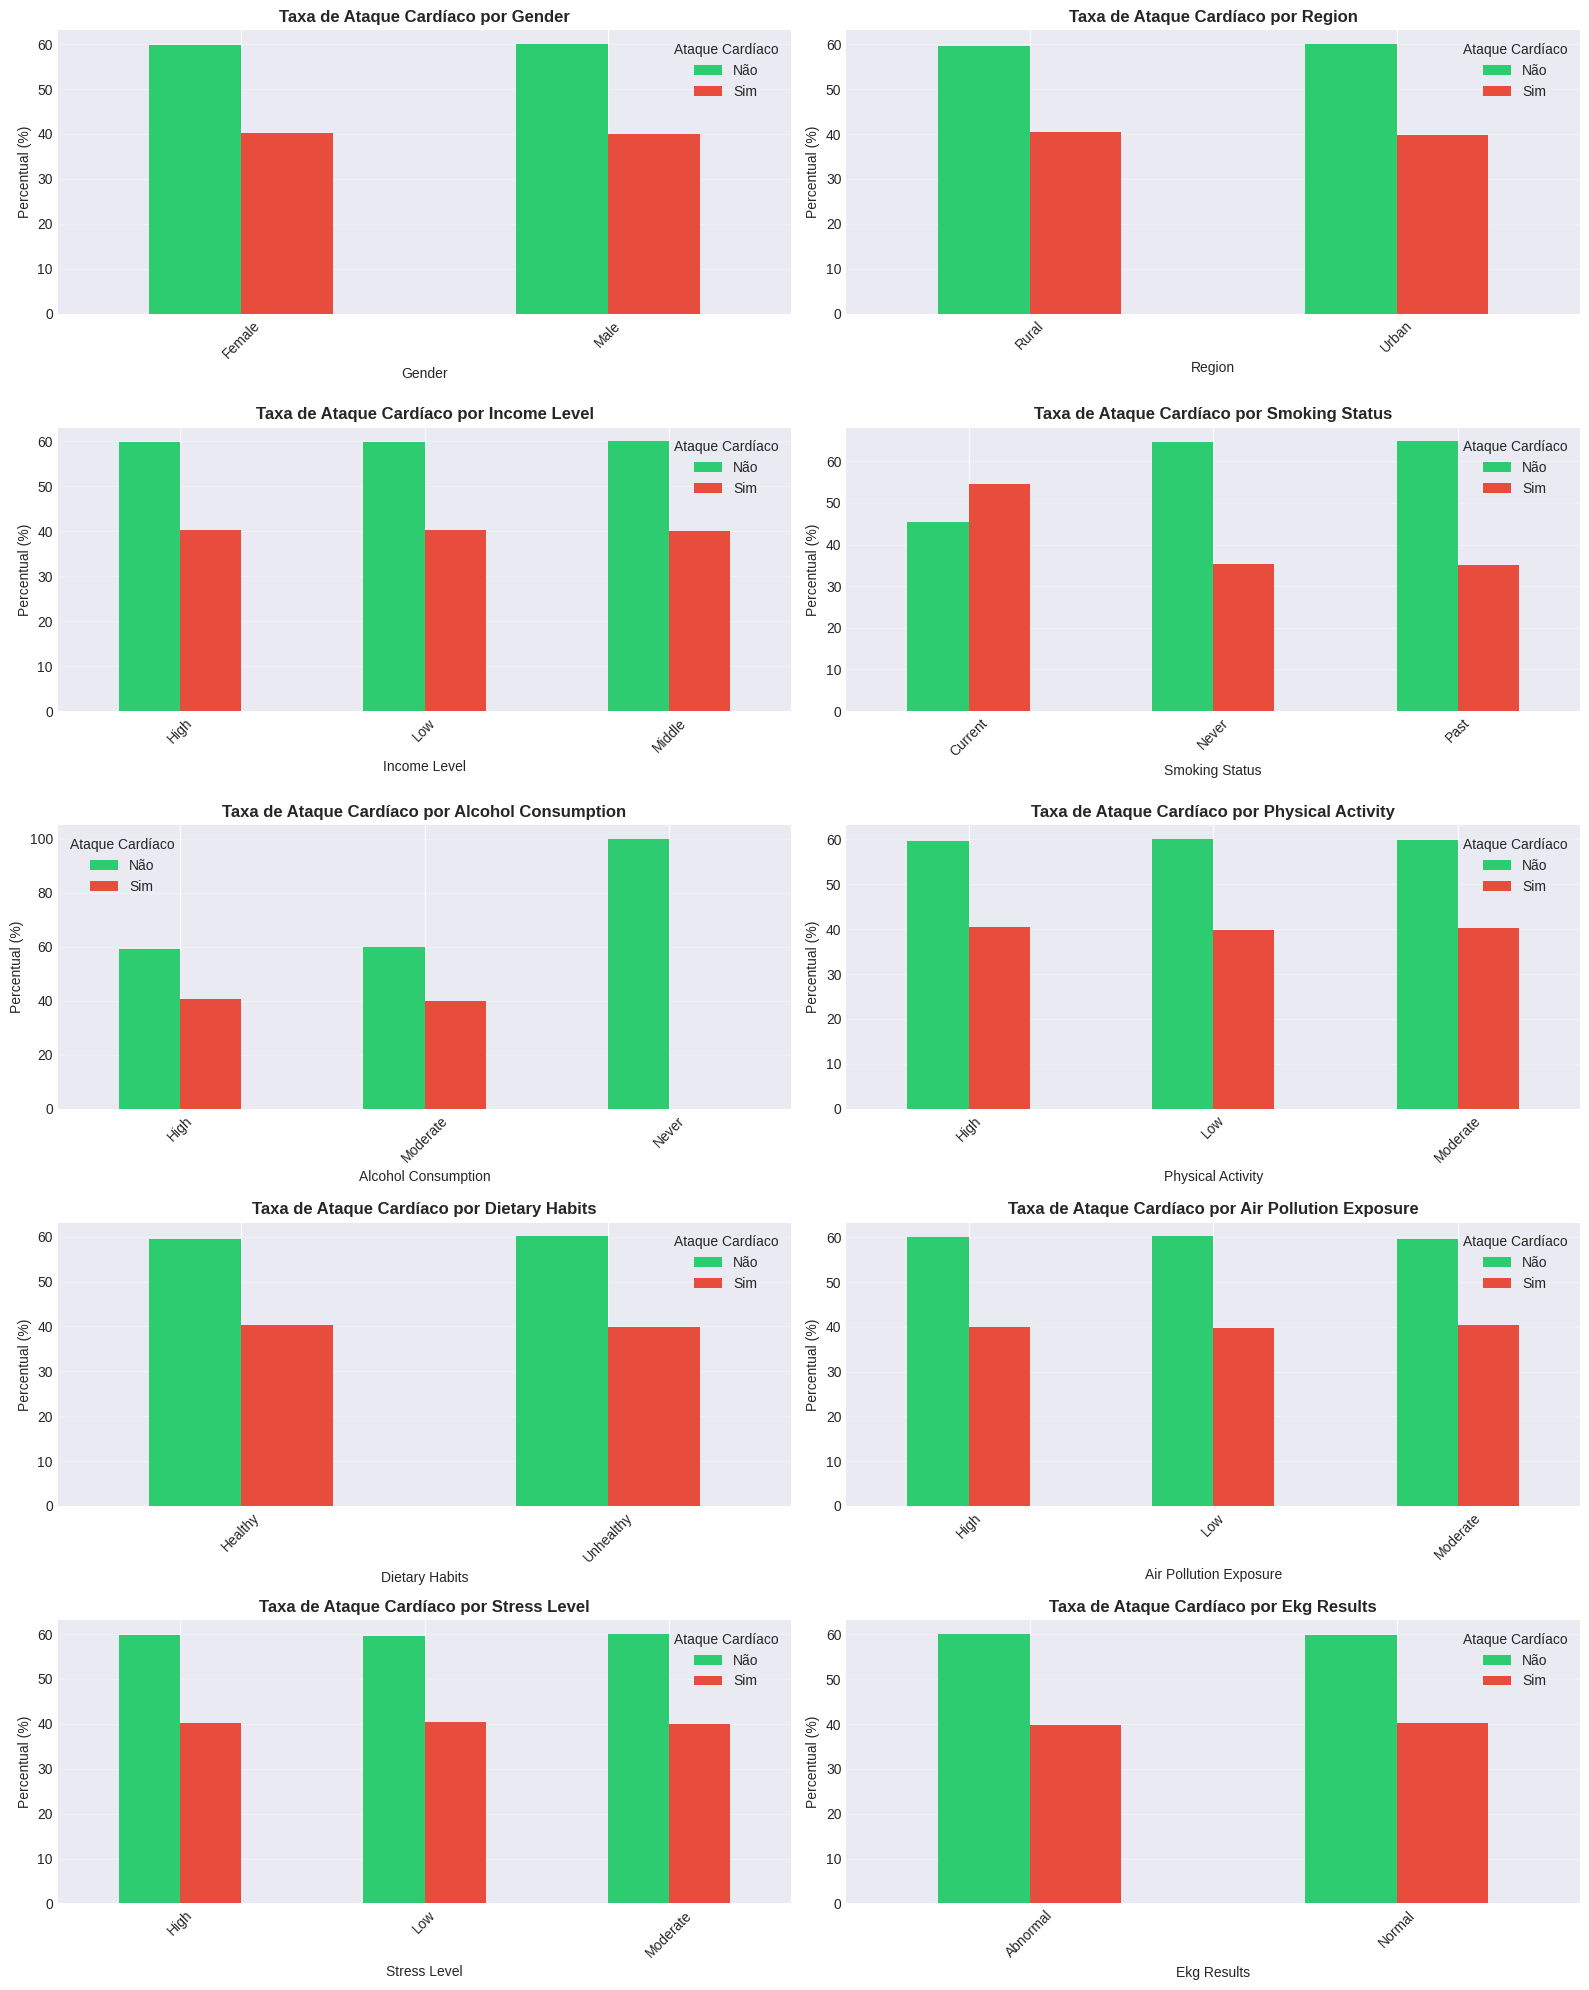

In [12]:
# Análise de variáveis categóricas vs target


fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        cross_tab = pd.crosstab(df[col], df['heart_attack'], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'Taxa de Ataque Cardíaco por {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Percentual (%)', fontsize=10)
        axes[idx].legend(['Não', 'Sim'], title='Ataque Cardíaco')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Análise de Variáveis Numéricas

**Importância das Variáveis Numéricas:**

Variáveis numéricas como idade, níveis de colesterol, pressão arterial e glicemia fornecem medidas quantitativas importantes para predição de risco cardiovascular.

**Análises Realizadas:**

1. **Histogramas com separação por target:**
   - Distribuição Verde: pacientes SEM ataque cardíaco
   - Distribuição Vermelha: pacientes COM ataque cardíaco
   - **Objetivo**: Identificar se há diferença nas distribuições entre os grupos

2. **Boxplots por target:**
   - Detectam outliers (pontos fora das caixas)
   - Mostram medianas (linha vermelha) e quartis (caixas)
   - **Objetivo**: Comparar valores típicos entre pacientes com e sem ataque cardíaco

**O que procurar:**
- **Separação clara** entre distribuições → variável potencialmente preditiva
- **Sobreposição total** → variável menos útil para predição
- **Outliers** → casos extremos que podem ser clinicamente relevantes

In [13]:
    # Identificar variáveis numéricas 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('heart_attack')  # Remover a variável comparativa 

print("Variáveis Numéricas:")
print(numerical_cols)
print(f"\nTotal: {len(numerical_cols)} variáveis numéricas")

Variáveis Numéricas:
['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'alcohol_missing']

Total: 18 variáveis numéricas


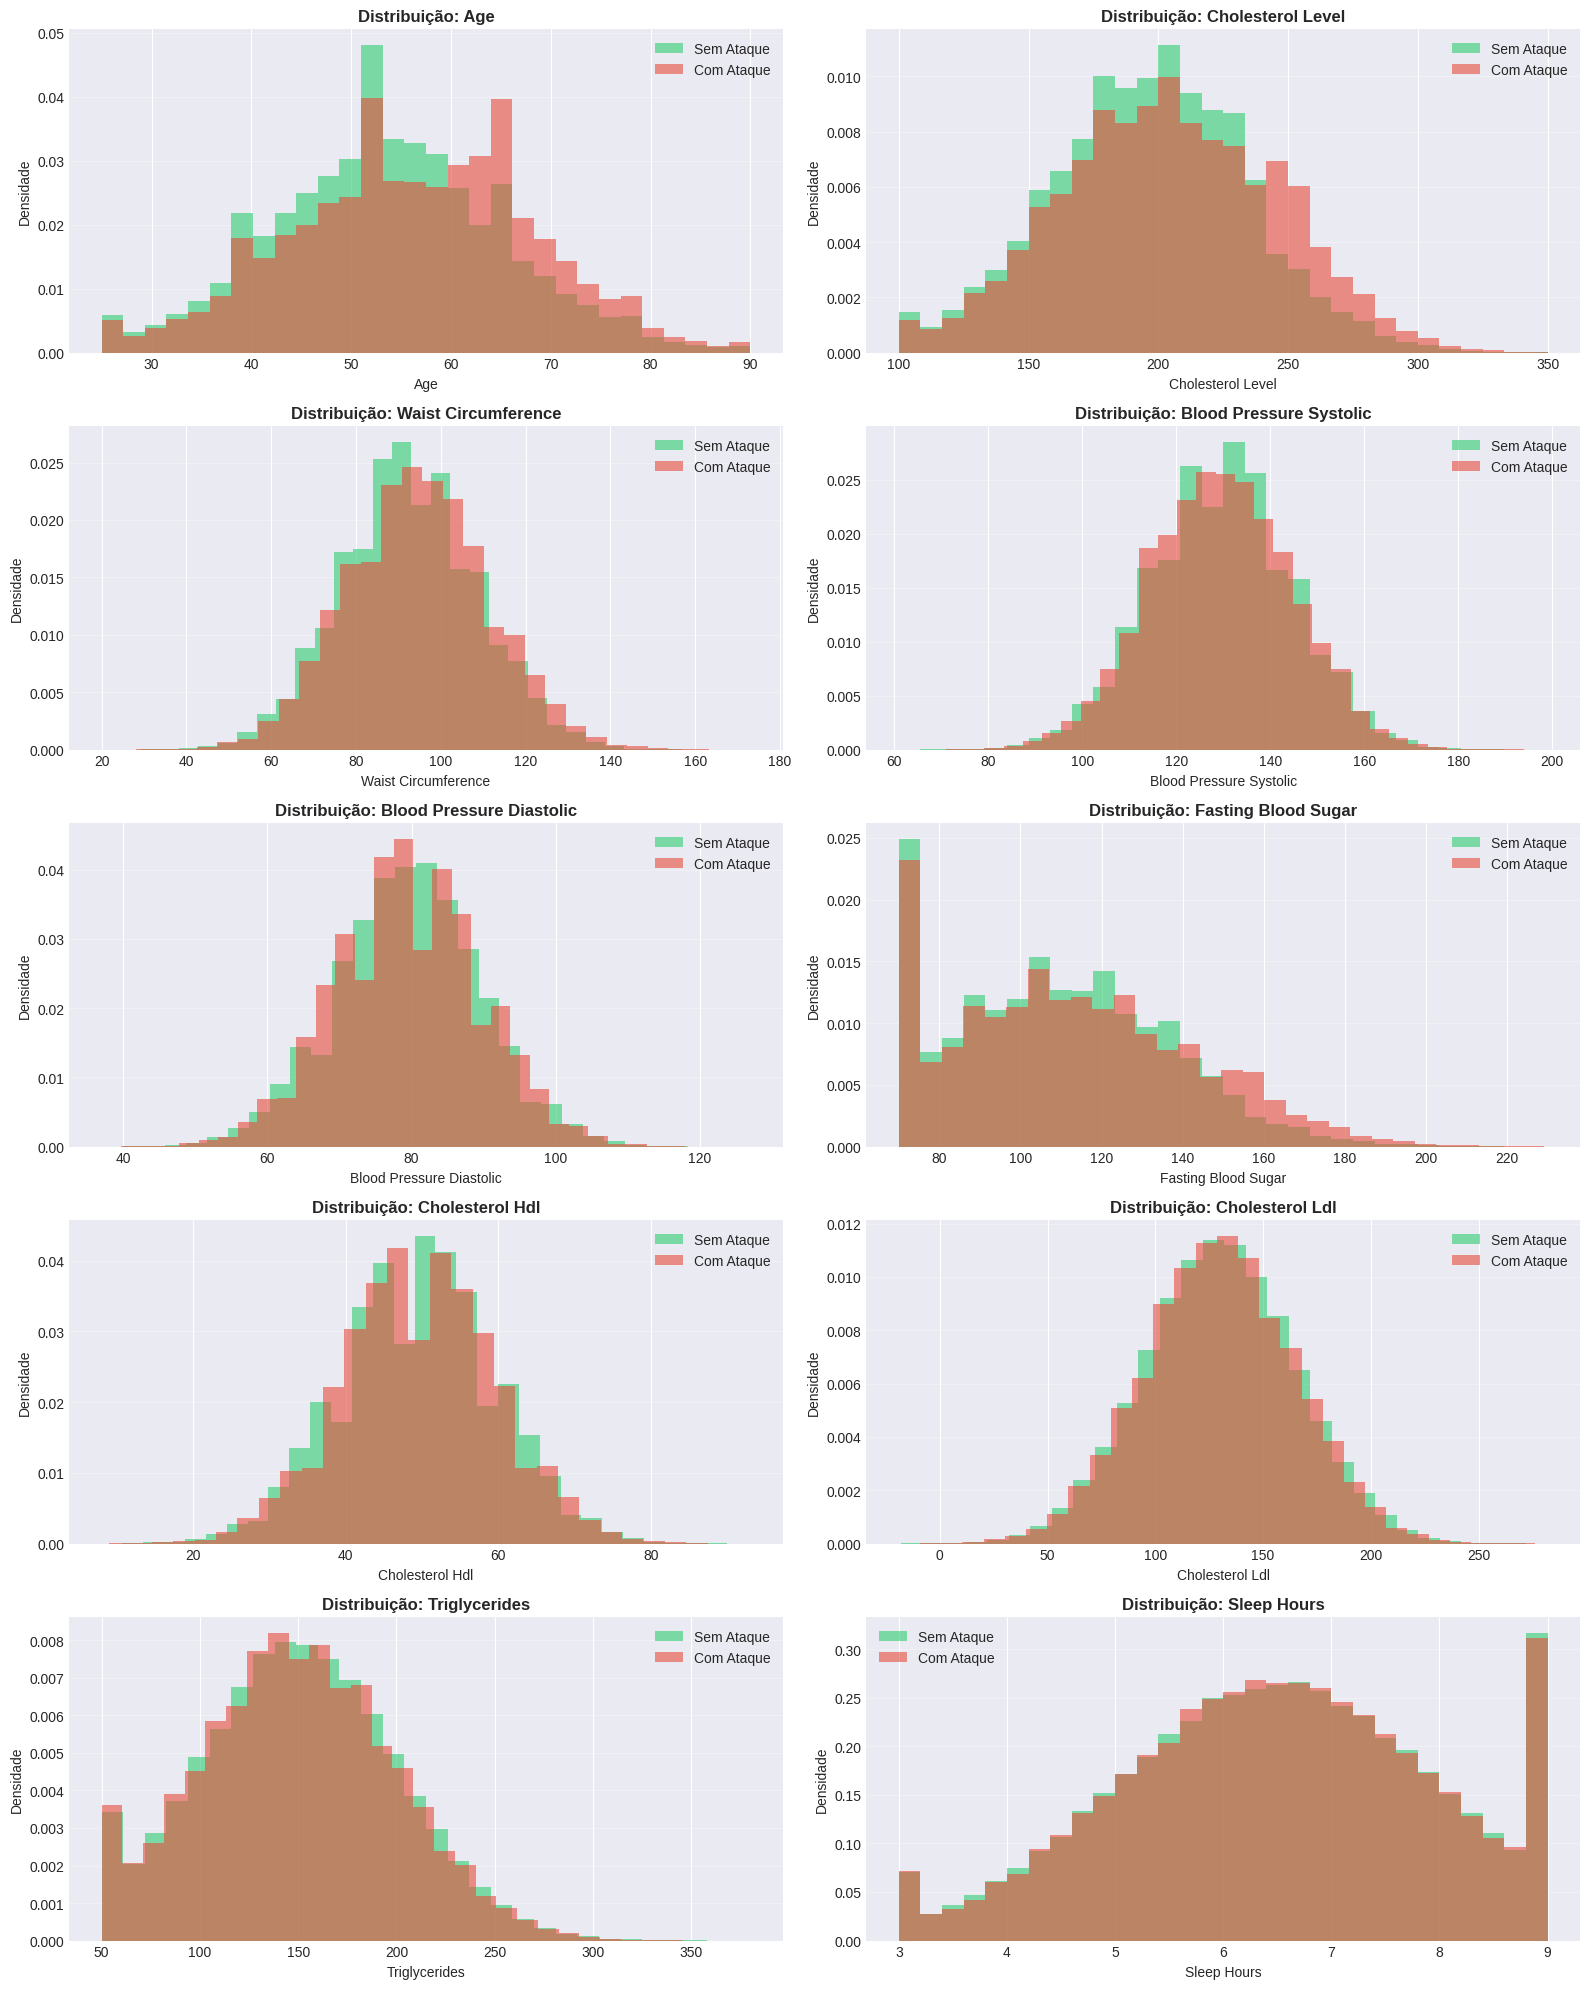

In [14]:
# Distribuição das principais variáveis numéricas
key_numerical = ['age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
                'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
                'cholesterol_ldl', 'triglycerides', 'sleep_hours']

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        # Histograma com KDE
        df[df['heart_attack'] == 0][col].hist(ax=axes[idx], bins=30, alpha=0.6, 
                                               label='Sem Ataque', color='#2ecc71', density=True)
        df[df['heart_attack'] == 1][col].hist(ax=axes[idx], bins=30, alpha=0.6, 
                                               label='Com Ataque', color='#e74c3c', density=True)
        
        axes[idx].set_title(f'Distribuição: {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Densidade', fontsize=10)
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
#plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

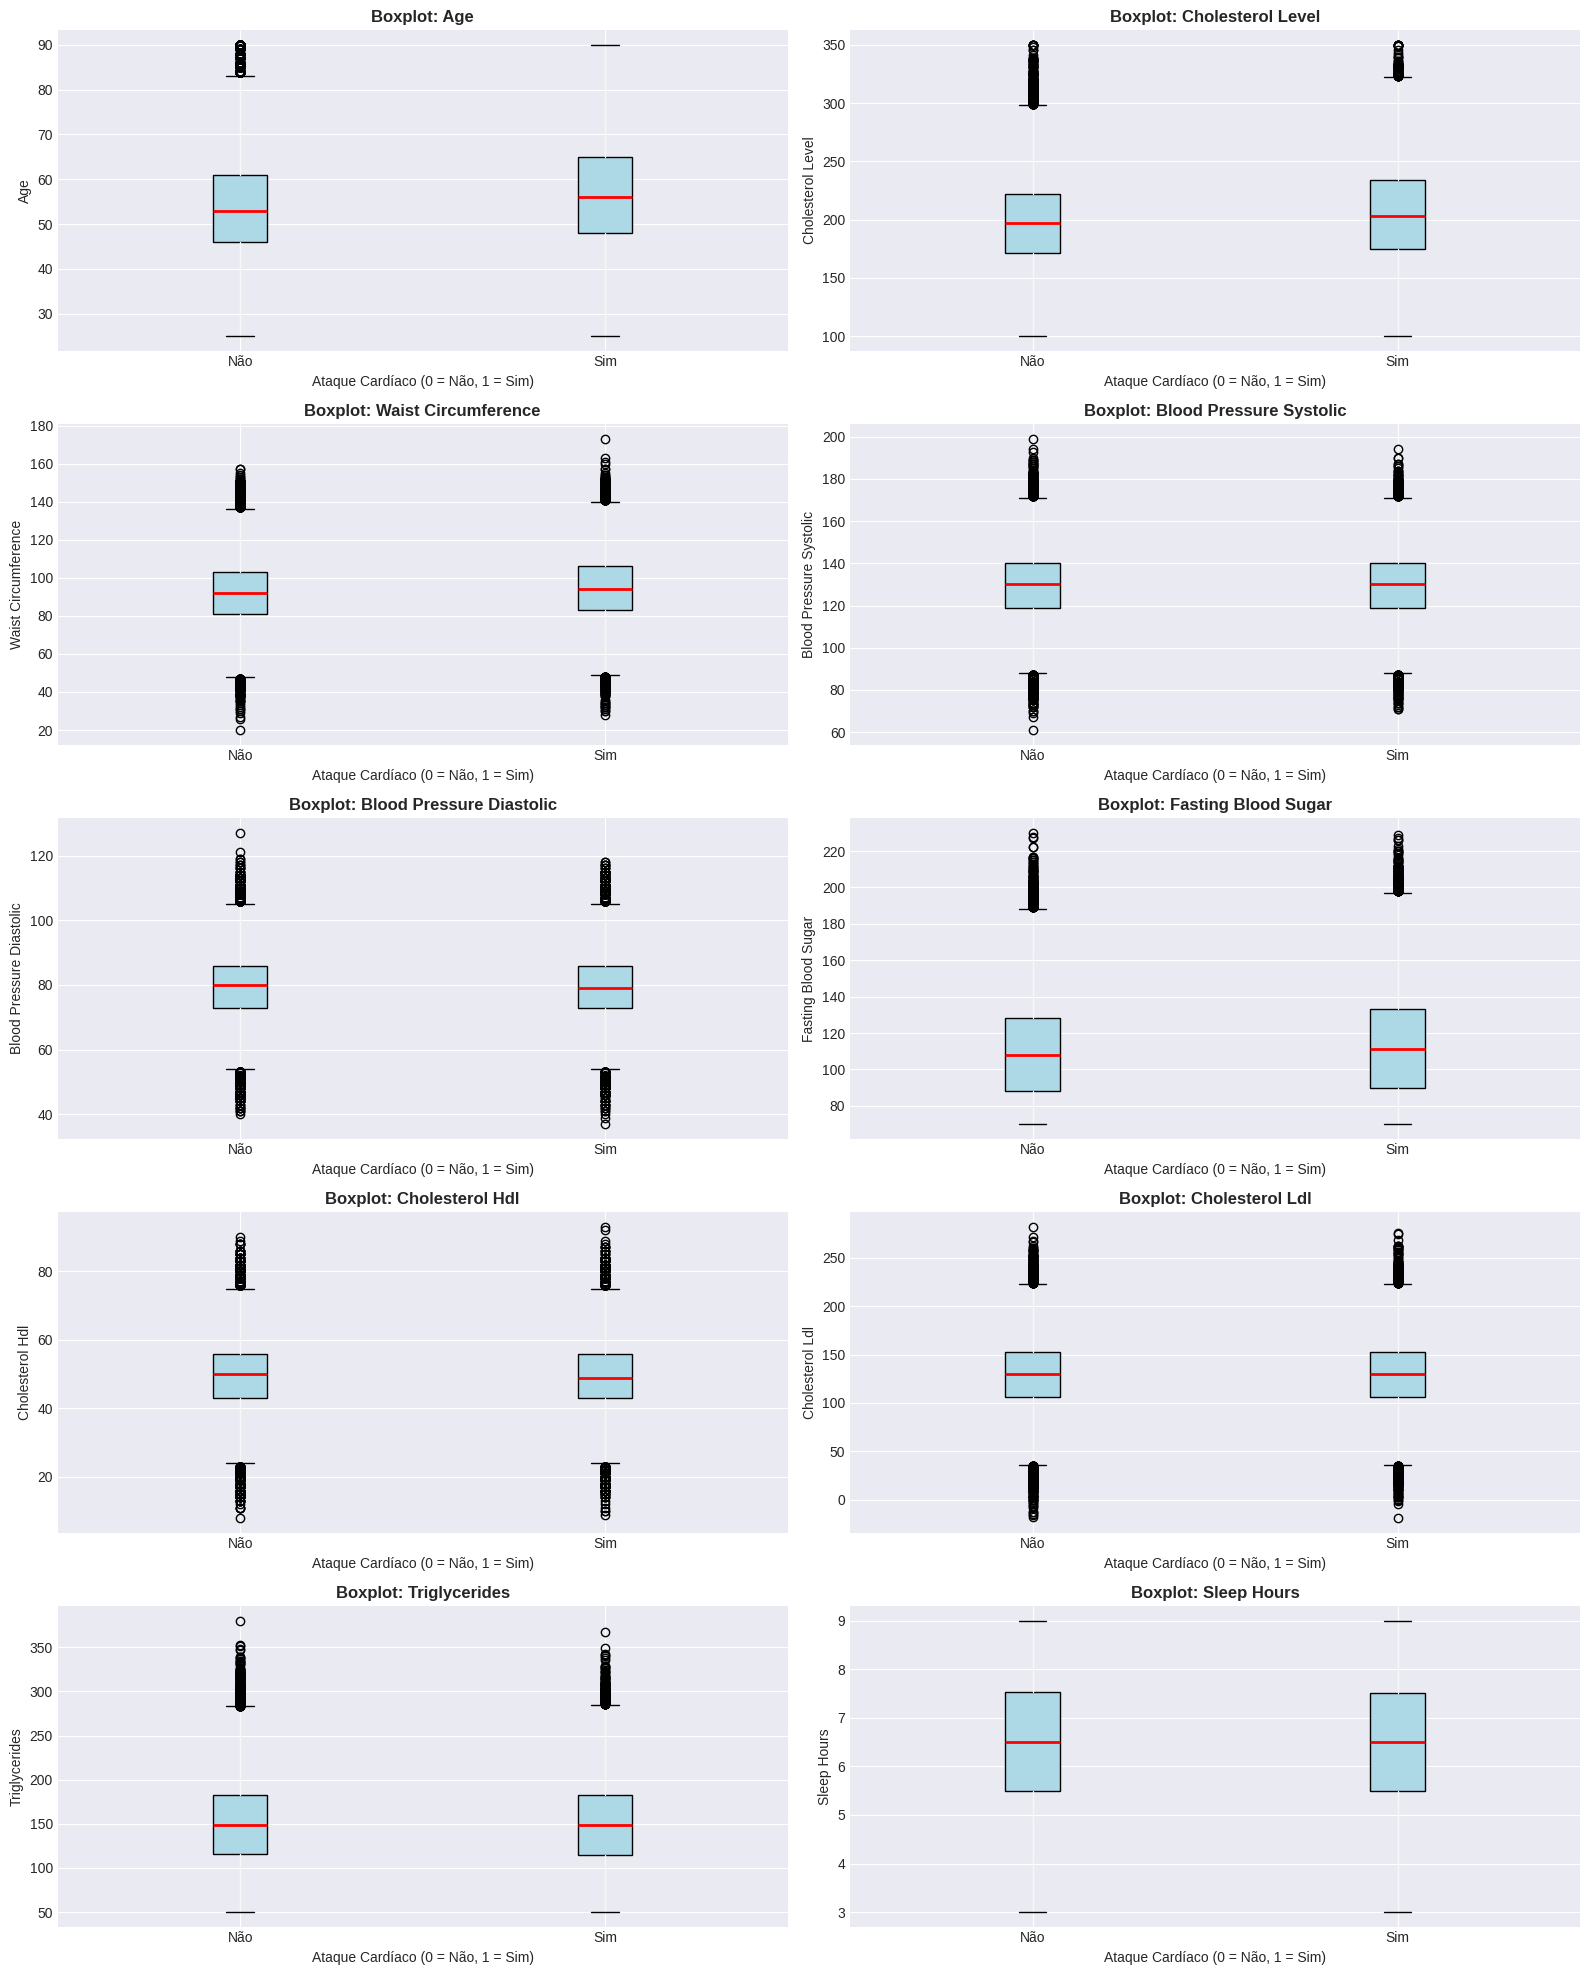

In [15]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        df.boxplot(column=col, by='heart_attack', ax=axes[idx], 
                  patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'),
                  medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Boxplot: {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Ataque Cardíaco (0 = Não, 1 = Sim)', fontsize=10)
        axes[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=10)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['Não', 'Sim'])

plt.suptitle('')  # Remove o título automático do pandas
plt.tight_layout()
#plt.savefig('numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Análise de Correlação

**O que é Correlação?**

A correlação mede a força e direção da relação linear entre duas variáveis, variando de -1 a +1:

- **+1**: correlação positiva perfeita (quando uma aumenta, a outra também aumenta)
- **0**: sem correlação linear
- **-1**: correlação negativa perfeita (quando uma aumenta, a outra diminui)

**Interpretação dos Valores:**
- 0.0 - 0.2: correlação muito fraca
- 0.2 - 0.4: correlação fraca
- 0.4 - 0.6: correlação moderada
- 0.6 - 0.8: correlação forte
- 0.8 - 1.0: correlação muito forte

**Por que isso importa?**

1. **Seleção de features**: Variáveis altamente correlacionadas com o target são bons preditores
2. **Multicolinearidade**: Variáveis muito correlacionadas entre si podem causar problemas em alguns modelos
3. **Insights clínicos**: Confirmar ou descobrir relações entre fatores de risco

**Nota Importante**: Correlação não implica causalidade! Uma correlação forte não significa que uma variável causa a outra.

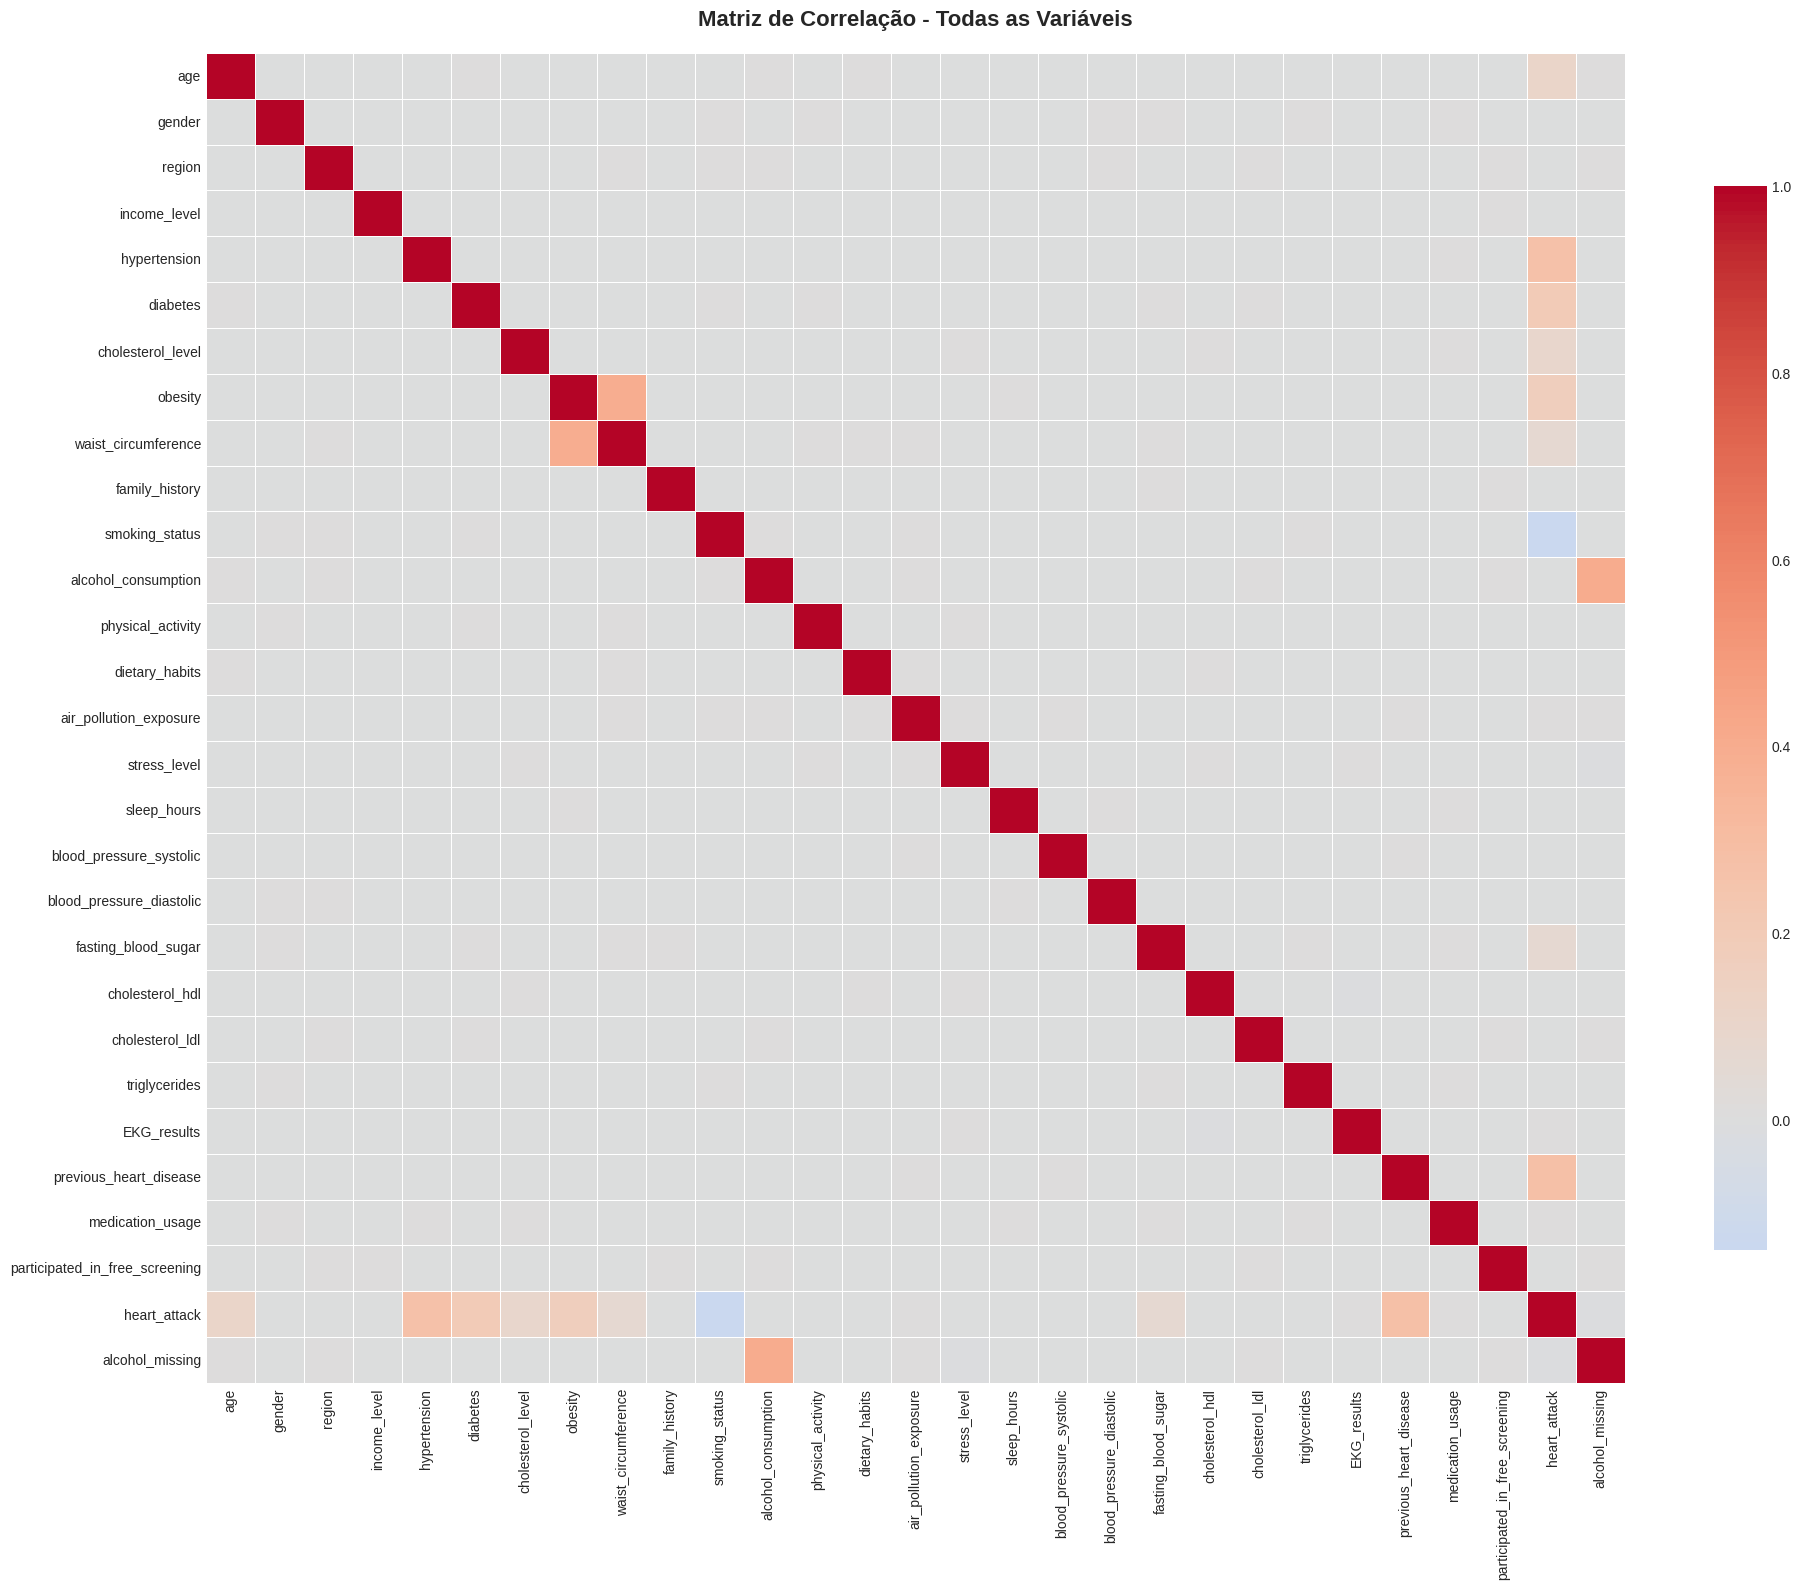

In [16]:
# Criar uma cópia do dataframe para análise de correlação
df_corr = df.copy()

# Codificar variáveis categóricas para análise de correlação
le = LabelEncoder()
for col in categorical_cols:
    if col in df_corr.columns:
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Calcular matriz de correlação
correlation_matrix = df_corr.corr()

# Visualizar matriz de correlação completa
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Todas as Variáveis', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
#plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELAÇÃO DAS VARIÁVEIS COM HEART_ATTACK (em %)
heart_attack                      100.00
previous_heart_disease             27.48
hypertension                       26.93
diabetes                           19.45
obesity                            17.17
age                                10.58
cholesterol_level                   9.26
fasting_blood_sugar                 6.98
waist_circumference                 6.79
medication_usage                    0.47
air_pollution_exposure              0.39
EKG_results                         0.26
family_history                      0.14
sleep_hours                         0.07
cholesterol_hdl                     0.06
cholesterol_ldl                     0.06
blood_pressure_diastolic           -0.03
triglycerides                      -0.07
physical_activity                  -0.07
blood_pressure_systolic            -0.16
income_level                       -0.19
stress_level                       -0.34
gender                             -0.35
particip

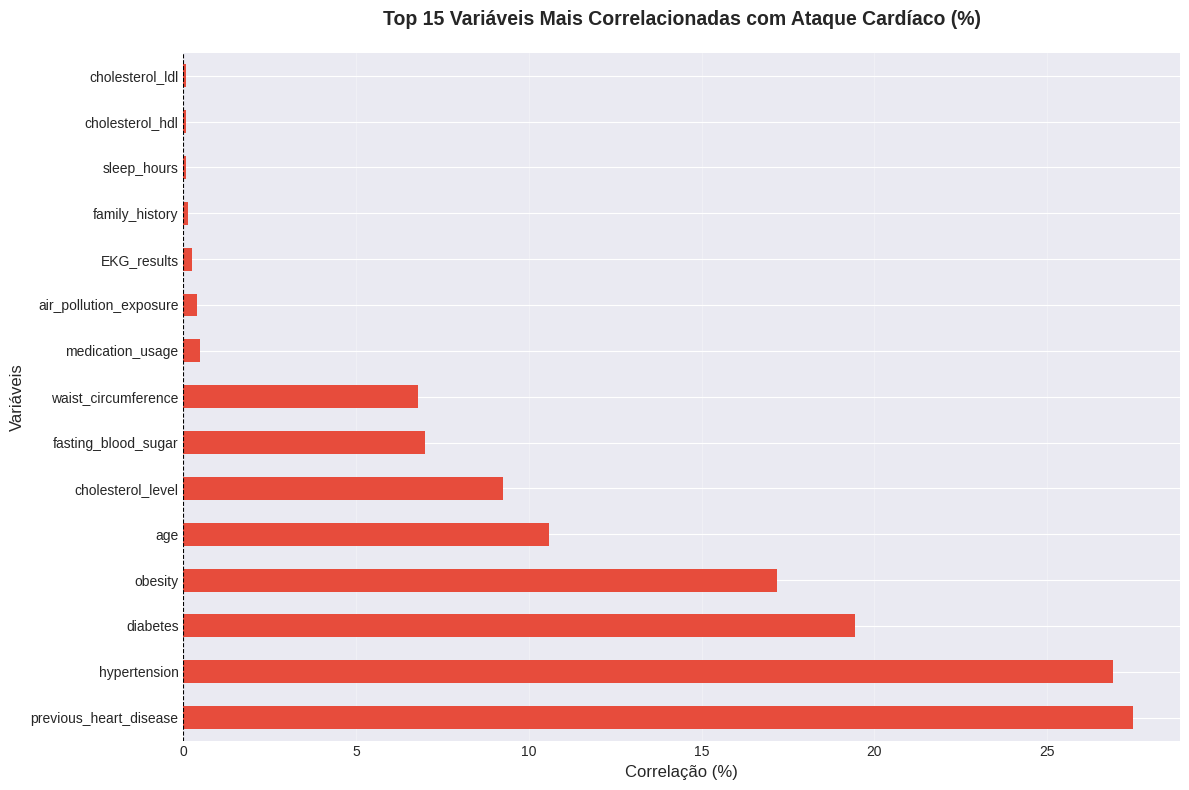

In [17]:
# Correlação com a variável target
target_correlation = correlation_matrix['heart_attack'].sort_values(ascending=False)

# Converter correlação em porcentagem
target_correlation_percent = target_correlation * 100

print("CORRELAÇÃO DAS VARIÁVEIS COM HEART_ATTACK (em %)")
print(target_correlation_percent.round(2))  # Arredondar para 2 casas decimais

# Visualizar top 15 correlações com o target
plt.figure(figsize=(12, 8))
top_corr = target_correlation_percent[1:16]  # Excluir a própria variável target

# Cores para correlações positivas e negativas
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_corr]

# Gráfico
top_corr.plot(kind='barh', color=colors)
plt.title('Top 15 Variáveis Mais Correlacionadas com Ataque Cardíaco (%)', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Correlação (%)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Pré-processamento de Dados

O pré-processamento é uma etapa fundamental que transforma os dados brutos em um formato adequado para os algoritmos de Machine Learning.

**Por que pré-processar?**

1. **Modelos de ML não entendem texto**: Variáveis categóricas precisam ser convertidas em números
2. **Escalas diferentes prejudicam o aprendizado**: Variáveis com escalas muito diferentes (ex: idade 0-100 vs triglicerídeos 0-500) precisam ser normalizadas
3. **Divisão treino/teste previne vazamento de dados**: Garante que o modelo seja avaliado em dados "novos"

### 5.1 Tratamento de Valores Ausentes e Inconsistências

**Estratégia de Tratamento:**

Nesta seção, verificamos a existência de valores inconsistentes que possam ter passado pela limpeza inicial, como:
- Valores negativos em variáveis que não deveriam tê-los
- Valores fora de faixas biologicamente plausíveis
- Padrões inesperados que possam indicar erros de coleta

**Princípio**: Sempre validar os dados antes de alimentar o modelo!

In [18]:
# Verificar valores inconsistentes em variáveis numéricas

print("VERIFICAÇÃO DE VALORES INCONSISTENTES")
# Verificar valores negativos onde não deveriam existir
numerical_positive = ['age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
                     'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
                     'cholesterol_ldl', 'triglycerides', 'sleep_hours']

for col in numerical_positive:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠️ {col}: {negative_count} valores negativos encontrados")
        else:
            print(f"✓ {col}: Sem valores negativos")

print("\n✓ Verificação de inconsistências concluída.")

VERIFICAÇÃO DE VALORES INCONSISTENTES
✓ age: Sem valores negativos
✓ cholesterol_level: Sem valores negativos
✓ waist_circumference: Sem valores negativos
✓ blood_pressure_systolic: Sem valores negativos
✓ blood_pressure_diastolic: Sem valores negativos
✓ fasting_blood_sugar: Sem valores negativos
✓ cholesterol_hdl: Sem valores negativos
⚠️ cholesterol_ldl: 14 valores negativos encontrados
✓ triglycerides: Sem valores negativos
✓ sleep_hours: Sem valores negativos

✓ Verificação de inconsistências concluída.


### 5.2 Pipeline de Pré-processamento

O pipeline de pré-processamento organiza de forma sequencial todas as transformações necessárias nos dados.

**Etapas do Pipeline:**

1. **Separação X (features) e y (target)**: Isolar a variável que queremos prever
2. **Codificação de variáveis categóricas**: Converter texto em números (Label Encoding)
3. **Divisão treino/validação/teste**: Criar conjuntos independentes para treinamento e avaliação
4. **Normalização**: Padronizar as escalas das variáveis numéricas

**Por que dividir em 3 conjuntos?**

- **Treino (70%)**: Usado para treinar o modelo
- **Validação (15%)**: Usado para ajustar hiperparâmetros e comparar modelos
- **Teste (15%)**: Usado APENAS no final para avaliação imparcial do melhor modelo

Isso previne overfitting e fornece uma estimativa realista do desempenho em produção.

In [19]:
# Separar features e target
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']


print("SEPARAÇÃO DE FEATURES E TARGET")

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")
print(f"\nDistribuição do target:")
print(y.value_counts())

print("\nDistribuição do target (em %):")
print((y.value_counts(normalize=True) * 100).round(2))

SEPARAÇÃO DE FEATURES E TARGET
Shape de X (features): (158356, 28)
Shape de y (target): (158356,)

Distribuição do target:
heart_attack
0    94855
1    63501
Name: count, dtype: int64

Distribuição do target (em %):
heart_attack
0    59.9
1    40.1
Name: proportion, dtype: float64


In [20]:
# Codificar variáveis categóricas

print("CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")


X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col}: {len(le.classes_)} categorias codificadas")

print(f"\n✓ Total de {len(label_encoders)} variáveis categóricas codificadas.")

CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
✓ gender: 2 categorias codificadas
✓ region: 2 categorias codificadas
✓ income_level: 3 categorias codificadas
✓ smoking_status: 3 categorias codificadas
✓ alcohol_consumption: 3 categorias codificadas
✓ physical_activity: 3 categorias codificadas
✓ dietary_habits: 2 categorias codificadas
✓ air_pollution_exposure: 3 categorias codificadas
✓ stress_level: 3 categorias codificadas
✓ EKG_results: 2 categorias codificadas

✓ Total de 10 variáveis categóricas codificadas.


In [21]:
# Divisão em conjuntos de treino, validação e teste

print("DIVISÃO DOS DADOS: TREINO, VALIDAÇÃO E TESTE")
print("="*80)

# Primeiro split: 70% treino, 30% temporário (validação + teste)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Segundo split: dividir os 30% em 15% validação e 15% teste
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Conjunto de Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribuição do target em cada conjunto:")
print(f"Treino: {y_train.value_counts().to_dict()}")
print(f"Validação: {y_val.value_counts().to_dict()}")
print(f"Teste: {y_test.value_counts().to_dict()}")

DIVISÃO DOS DADOS: TREINO, VALIDAÇÃO E TESTE
Conjunto de Treino: 110849 amostras (70.0%)
Conjunto de Validação: 23753 amostras (15.0%)
Conjunto de Teste: 23754 amostras (15.0%)

Distribuição do target em cada conjunto:
Treino: {0: 66398, 1: 44451}
Validação: {0: 14228, 1: 9525}
Teste: {0: 14229, 1: 9525}


In [22]:
# Normalização das features

print("NORMALIZAÇÃO DAS FEATURES")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✓ Features normalizadas usando StandardScaler")
print(f"\nMédia das features após normalização (treino): {X_train_scaled.mean():.6f}")
print(f"Desvio padrão das features após normalização (treino): {X_train_scaled.std():.6f}")

NORMALIZAÇÃO DAS FEATURES
✓ Features normalizadas usando StandardScaler

Média das features após normalização (treino): -0.000000
Desvio padrão das features após normalização (treino): 1.000000


## 6. Modelagem de Machine Learning

A modelagem é o coração do projeto, onde aplicamos algoritmos que aprendem padrões dos dados para fazer predições.

**Estratégia de Modelagem:**

Testaremos múltiplos algoritmos para identificar qual tem melhor desempenho neste problema específico. Cada algoritmo tem características diferentes:

### 6.1 Seleção e Treinamento de Modelos

**Modelos Selecionados:**

1. **Regressão Logística**
   - **Tipo**: Linear
   - **Vantagens**: Simples, rápido, muito interpretável
   - **Quando usar**: Baseline, relações lineares
   - **Interpretação**: Coeficientes mostram impacto de cada variável

2. **Árvore de Decisão**
   - **Tipo**: Não-linear, baseado em regras
   - **Vantagens**: Fácil interpretação, captura interações
   - **Desvantagens**: Tende a overfitting
   - **Interpretação**: Sequência de decisões em forma de árvore

3. **Random Forest**
   - **Tipo**: Ensemble de árvores
   - **Vantagens**: Robusto, lida bem com não-linearidades, reduz overfitting
   - **Como funciona**: Combina múltiplas árvores de decisão
   - **Interpretação**: Feature importance mostra variáveis mais relevantes

4. **K-Nearest Neighbors (KNN)**
   - **Tipo**: Baseado em instâncias
   - **Vantagens**: Simples, não paramétrico
   - **Como funciona**: Classifica baseado nos K vizinhos mais próximos
   - **Desvantagens**: Sensível à escala e ao valor de K

**Métricas de Avaliação:**

- **Accuracy**: % de predições corretas (cuidado com desbalanceamento!)
- **Precision**: Dos que o modelo disse "sim", quantos estavam certos?
- **Recall**: Dos que eram "sim", quantos o modelo acertou?
- **F1-Score**: Média harmônica entre Precision e Recall (MÉTRICA PRINCIPAL)
- **ROC-AUC**: Capacidade de separar as classes em diferentes thresholds

In [23]:
# Definir modelos a serem testados
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    #'SVM': SVC(random_state=42, probability=True)
}


print("MODELOS SELECIONADOS PARA TREINAMENTO")

for i, (name, model) in enumerate(models.items(), 1):
    print(f"{i}. {name}")

MODELOS SELECIONADOS PARA TREINAMENTO
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN


In [24]:
# Treinar e avaliar modelos
print("\n" + "="*80)
print("TREINAMENTO E AVALIAÇÃO DOS MODELOS")


results = []
trained_models = {}

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Treinando: {name}")
    print(f"{'='*80}")
    
    # Treinar o modelo
    model.fit(X_train_scaled, y_train)
    
    # Predições no conjunto de validação
    y_val_pred = model.predict(X_val_scaled)
    y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calcular métricas
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba) if y_val_pred_proba is not None else None
    
    # Armazenar resultados
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    trained_models[name] = model
    
    print(f"✓ Accuracy: {accuracy:.4f}")
    print(f"✓ Precision: {precision:.4f}")
    print(f"✓ Recall: {recall:.4f}")
    print(f"✓ F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"✓ ROC-AUC: {roc_auc:.4f}")

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)


print("RESUMO COMPARATIVO DOS MODELOS (CONJUNTO DE VALIDAÇÃO)")

print(results_df.to_string(index=False))


TREINAMENTO E AVALIAÇÃO DOS MODELOS

Treinando: Logistic Regression
✓ Accuracy: 0.7282
✓ Precision: 0.6893
✓ Recall: 0.5865
✓ F1-Score: 0.6337
✓ ROC-AUC: 0.7996

Treinando: Decision Tree
✓ Accuracy: 0.6580
✓ Precision: 0.5731
✓ Recall: 0.5770
✓ F1-Score: 0.5750
✓ ROC-AUC: 0.6446

Treinando: Random Forest
✓ Accuracy: 0.7311
✓ Precision: 0.6879
✓ Recall: 0.6029
✓ F1-Score: 0.6426
✓ ROC-AUC: 0.8084

Treinando: KNN
✓ Accuracy: 0.6801
✓ Precision: 0.6334
✓ Recall: 0.4800
✓ F1-Score: 0.5461
✓ ROC-AUC: 0.7182
RESUMO COMPARATIVO DOS MODELOS (CONJUNTO DE VALIDAÇÃO)
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest  0.731066   0.687867 0.602940  0.642609 0.808388
Logistic Regression  0.728161   0.689289 0.586457  0.633729 0.799550
      Decision Tree  0.658022   0.573097 0.577008  0.575046 0.644633
                KNN  0.680083   0.633416 0.480000  0.546139 0.718189


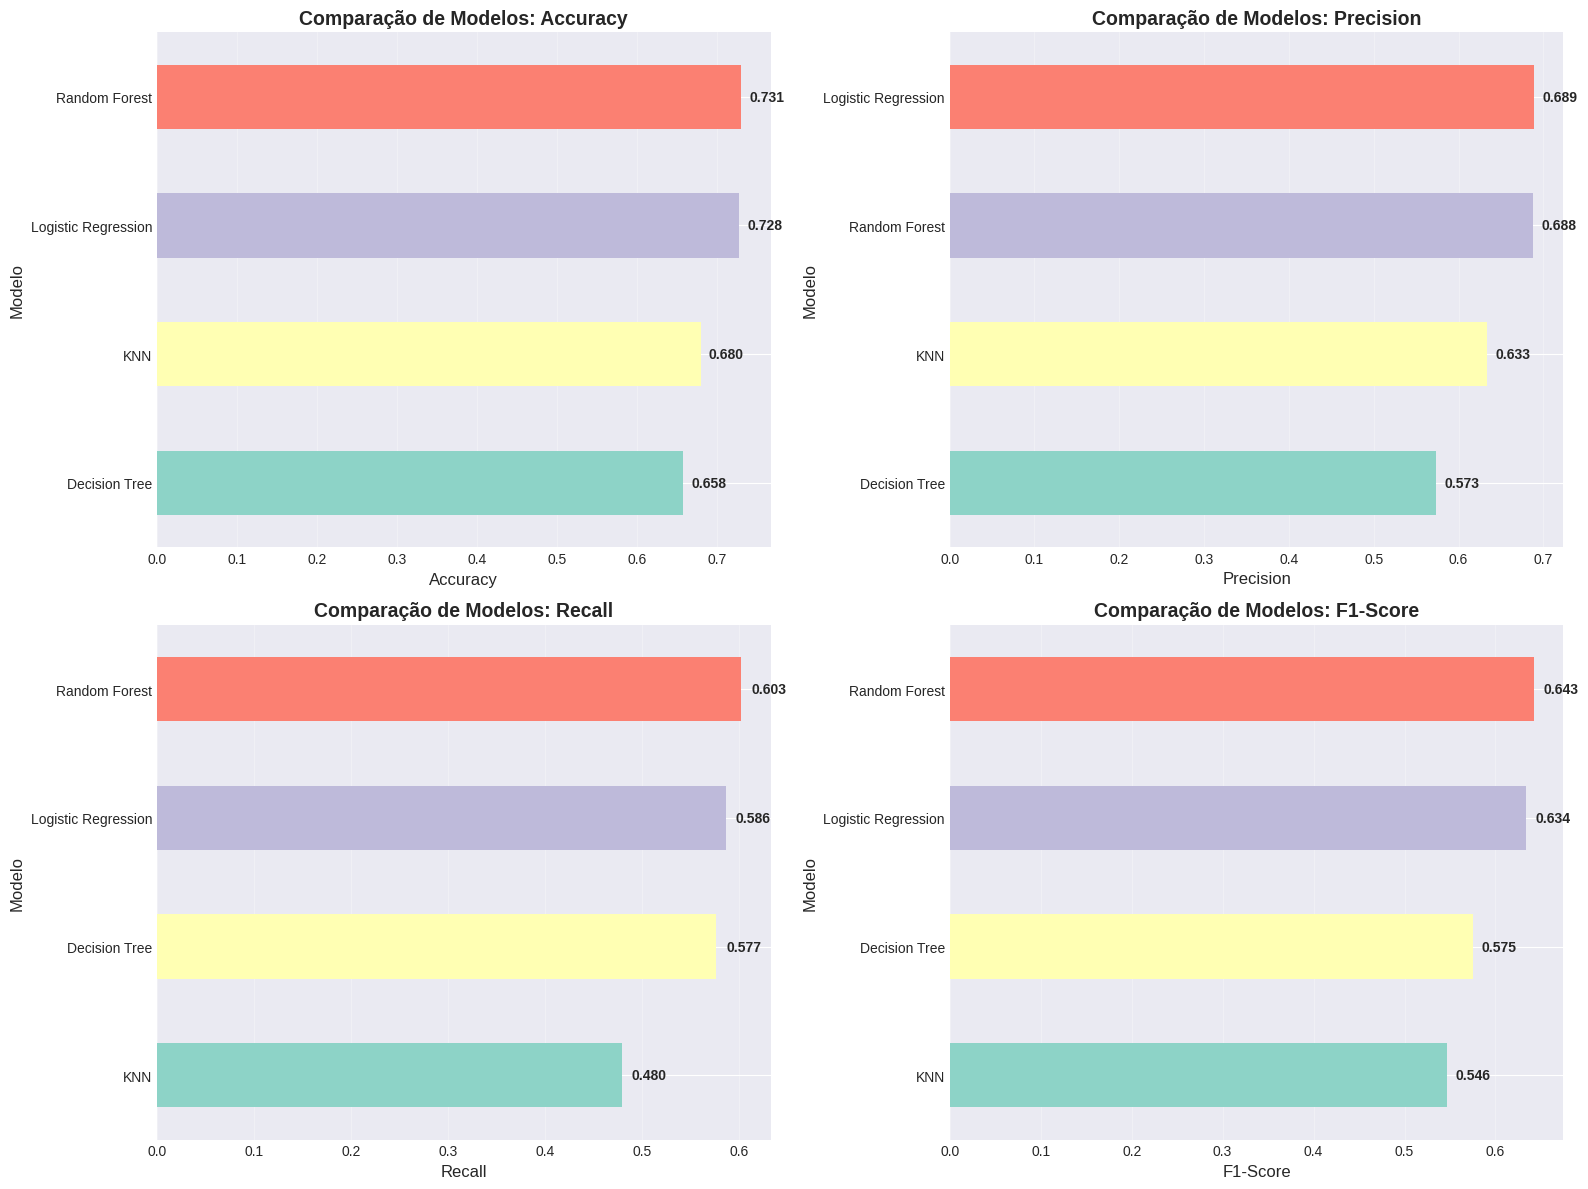

In [25]:
# Visualizar comparação de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_palette = plt.cm.Set3(range(len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df_sorted = results_df.sort_values(metric, ascending=True)
    results_df_sorted.plot(x='Model', y=metric, kind='barh', ax=ax, 
                          color=colors_palette, legend=False)
    ax.set_title(f'Comparação de Modelos: {metric}', fontsize=14, fontweight='bold')
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('Modelo', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(results_df_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()

plt.show()

In [26]:
# Selecionar o melhor modelo baseado no F1-Score
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]


print("MELHOR MODELO SELECIONADO")
print(f"Modelo: {best_model_name}")
print(f"F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"\nParâmetros atuais:")
print(best_model.get_params())

MELHOR MODELO SELECIONADO
Modelo: Random Forest
F1-Score: 0.6426

Parâmetros atuais:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [27]:
# Avaliação final no conjunto de teste

print("AVALIAÇÃO FINAL NO CONJUNTO DE TESTE")


y_test_pred = best_model.predict(X_test_scaled)
y_test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Métricas finais
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else None

print(f"\nModelo: {best_model_name}")
print(f"{'='*80}")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"Recall: {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"F1-Score: {test_f1:.4f} ({test_f1*100:.2f}%)")
if test_roc_auc:
    print(f"ROC-AUC: {test_roc_auc:.4f} ({test_roc_auc*100:.2f}%)")

AVALIAÇÃO FINAL NO CONJUNTO DE TESTE

Modelo: Random Forest
Accuracy: 0.7293 (72.93%)
Precision: 0.6913 (69.13%)
Recall: 0.5869 (58.69%)
F1-Score: 0.6348 (63.48%)
ROC-AUC: 0.8042 (80.42%)


In [28]:
# Relatório de classificação detalhado
print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO DETALHADO")

print(classification_report(y_test, y_test_pred, target_names=['Sem Ataque (0)', 'Com Ataque (1)']))


RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
                precision    recall  f1-score   support

Sem Ataque (0)       0.75      0.82      0.78     14229
Com Ataque (1)       0.69      0.59      0.63      9525

      accuracy                           0.73     23754
     macro avg       0.72      0.71      0.71     23754
  weighted avg       0.73      0.73      0.72     23754



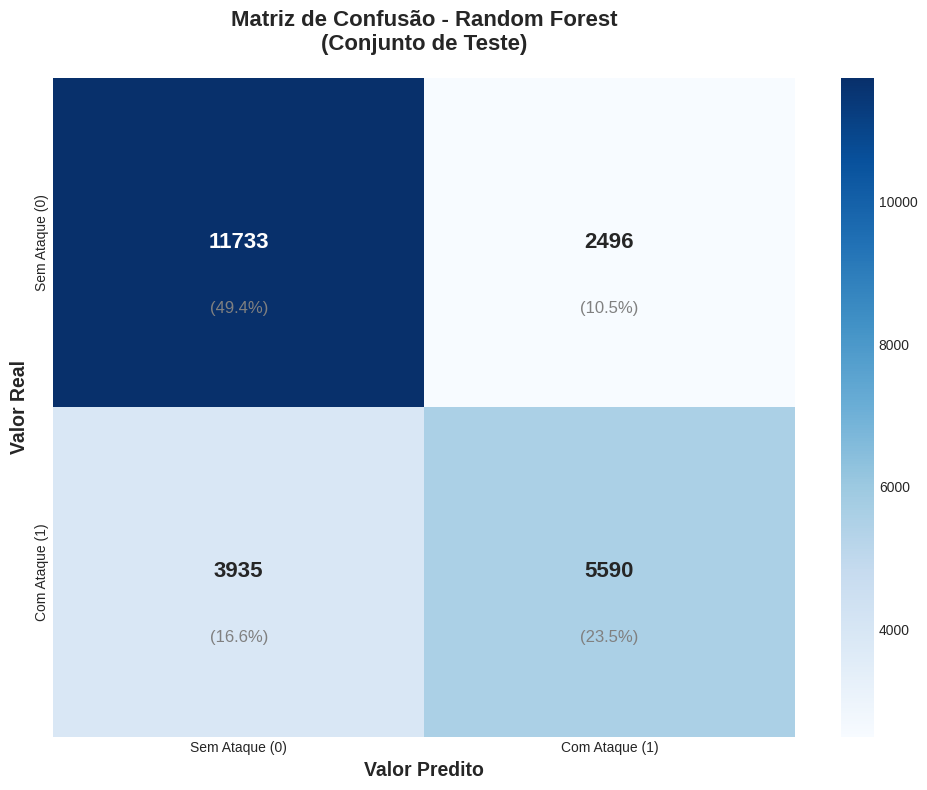


ANÁLISE DA MATRIZ DE CONFUSÃO
Verdadeiros Negativos (TN): 11733 - Pacientes sem ataque corretamente identificados
Falsos Positivos (FP): 2496 - Pacientes sem ataque identificados incorretamente como com ataque
Falsos Negativos (FN): 3935 - Pacientes com ataque identificados incorretamente como sem ataque
Verdadeiros Positivos (TP): 5590 - Pacientes com ataque corretamente identificados

⚠️ Taxa de Falsos Negativos: 41.31% - Casos críticos não detectados
⚠️ Taxa de Falsos Positivos: 17.54% - Alarmes falsos


In [29]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Sem Ataque (0)', 'Com Ataque (1)'],
            yticklabels=['Sem Ataque (0)', 'Com Ataque (1)'],
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title(f'Matriz de Confusão - {best_model_name}\n(Conjunto de Teste)', 
         fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=14, fontweight='bold')
plt.xlabel('Valor Predito', fontsize=14, fontweight='bold')

# Adicionar percentuais
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm.sum() * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=12, color='gray')

plt.tight_layout()
#plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise da matriz de confusão
tn, fp, fn, tp = cm.ravel()
print("\n" + "="*80)
print("ANÁLISE DA MATRIZ DE CONFUSÃO")

print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem ataque corretamente identificados")
print(f"Falsos Positivos (FP): {fp} - Pacientes sem ataque identificados incorretamente como com ataque")
print(f"Falsos Negativos (FN): {fn} - Pacientes com ataque identificados incorretamente como sem ataque")
print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com ataque corretamente identificados")
print(f"\n⚠️ Taxa de Falsos Negativos: {fn/(fn+tp)*100:.2f}% - Casos críticos não detectados")
print(f"⚠️ Taxa de Falsos Positivos: {fp/(fp+tn)*100:.2f}% - Alarmes falsos")

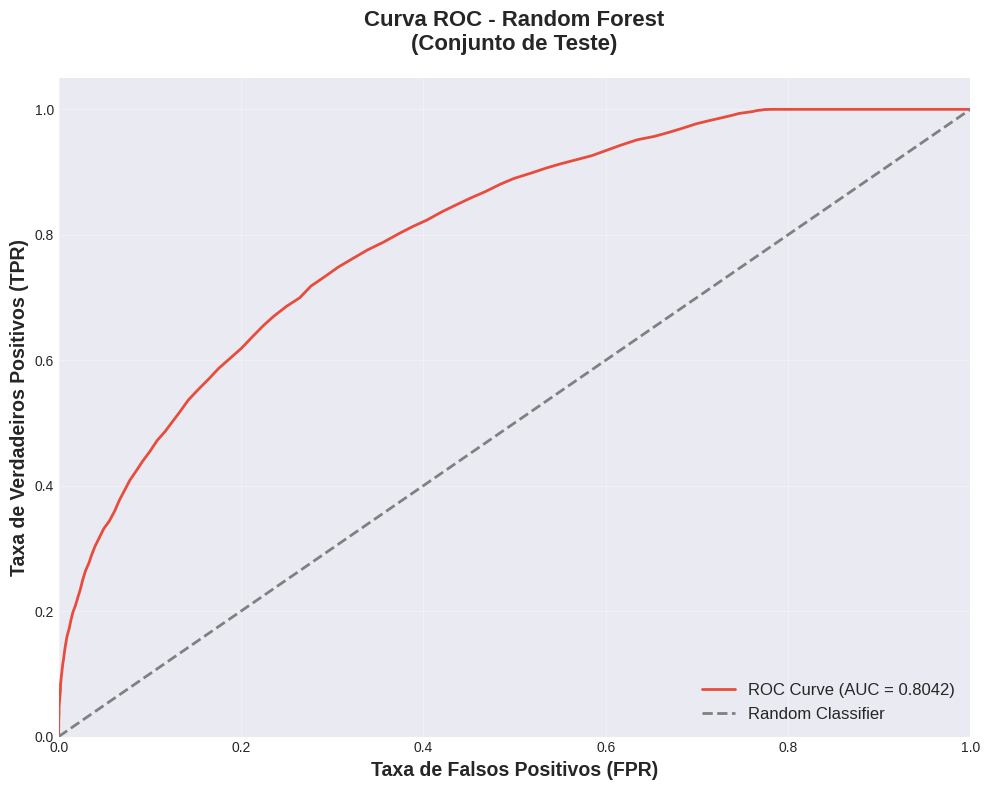

In [30]:
# Curva ROC
if y_test_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='#e74c3c', linewidth=2, label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14, fontweight='bold')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14, fontweight='bold')
    plt.title(f'Curva ROC - {best_model_name}\n(Conjunto de Teste)', 
             fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    #plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

## 7. Interpretabilidade do Modelo

**Como interpretar:**
- **Valores altos**: A variável tem grande influência nas predições
- **Valores baixos**: A variável contribui pouco para o modelo

**Para modelos baseados em árvore (Random Forest, Decision Tree):**
- Importância calculada pela redução média de impureza (Gini)

**Para modelos lineares (Regressão Logística):**
- Coeficientes absolutos indicam a força da associação
- Coeficientes positivos: aumento da variável aumenta probabilidade de ataque
- Coeficientes negativos: aumento da variável diminui probabilidade de ataque

ANÁLISE DE IMPORTÂNCIA DAS FEATURES

Top 15 Features Mais Importantes:
                 Feature  Importance
       cholesterol_level    0.077207
  previous_heart_disease    0.074670
            hypertension    0.071295
                     age    0.068395
     fasting_blood_sugar    0.065804
             sleep_hours    0.061840
           triglycerides    0.060001
         cholesterol_ldl    0.059508
     waist_circumference    0.056546
 blood_pressure_systolic    0.055570
blood_pressure_diastolic    0.053068
         cholesterol_hdl    0.052916
                diabetes    0.037112
          smoking_status    0.035254
                 obesity    0.027645


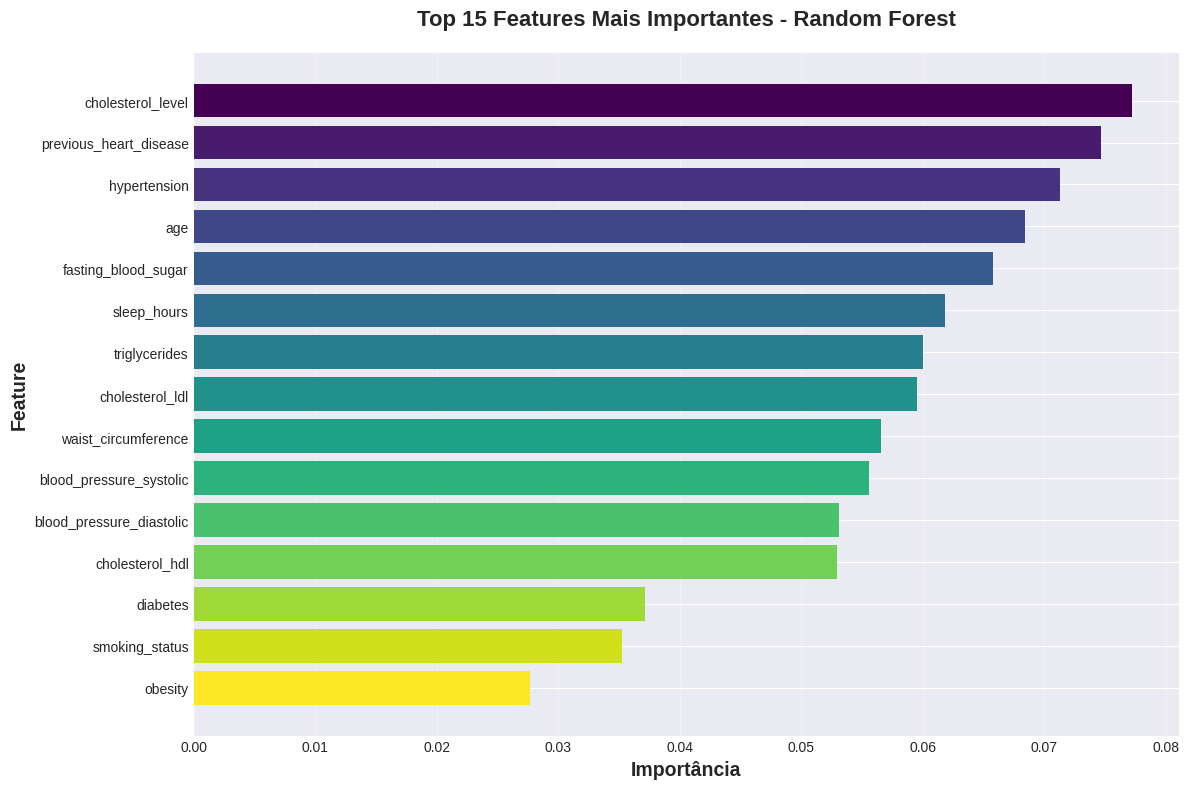

In [31]:
# Feature Importance

print("ANÁLISE DE IMPORTÂNCIA DAS FEATURES")


feature_names = X.columns.tolist()

if hasattr(best_model, 'feature_importances_'):
    # Para modelos baseados em árvore
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Features Mais Importantes:")
    print(feature_importance_df.head(15).to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    plt.barh(range(len(top_features)), top_features['Importance'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    #plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # Para modelos lineares
    coefficients = best_model.coef_[0]
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print("\nTop 15 Features Mais Importantes (por coeficiente):")
    print(feature_importance_df.head(15)[['Feature', 'Coefficient']].to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coeficiente', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    #plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Feature importance não disponível para este modelo.")
    print("Utilizando Permutation Importance...")
    
    perm_importance = permutation_importance(
        best_model, X_test_scaled, y_test, 
        n_repeats=10, random_state=42, n_jobs=-1
    )
    
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importance.importances_mean
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Features Mais Importantes (Permutation Importance):")
    print(feature_importance_df.head(15).to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    plt.barh(range(len(top_features)), top_features['Importance'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância (Permutation)', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 7.2 Análise SHAP (SHapley Additive exPlanations)

**O que é SHAP?**

SHAP é uma técnica avançada de interpretabilidade baseada em teoria dos jogos que explica a contribuição de cada feature para predições individuais.

**Diferença entre Feature Importance e SHAP:**

- **Feature Importance**: Importância global - qual variável é mais importante no geral?
- **SHAP**: Pode mostrar importância tanto global quanto local - como cada variável contribuiu para UMA predição específica?

**Como interpretar os gráficos SHAP:**

1. **SHAP Summary Plot (Barras):**
   - Mostra features ordenadas por importância média absoluta
   - Quanto maior a barra, mais importante a feature

2. **SHAP Summary Plot (Detalhado):**
   - Cada ponto é uma predição
   - Cor: valor da feature (vermelho = alto, azul = baixo)
   - Posição horizontal: impacto SHAP (direita = aumenta probabilidade de ataque)
   - **Exemplo de interpretação**: Se "age" tem muitos pontos vermelhos à direita, significa que idades altas aumentam o risco de ataque cardíaco

**Valor de SHAP:**
- Fornece explicações consistentes e teoricamente fundamentadas
- Permite explicar predições individuais para pacientes específicos
- Ajuda a identificar interações entre variáveis

ANÁLISE SHAP - INTERPRETABILIDADE DO MODELO

Calculando valores SHAP (pode levar alguns minutos)...
✓ Valores SHAP calculados com sucesso!


<Figure size 1200x800 with 0 Axes>

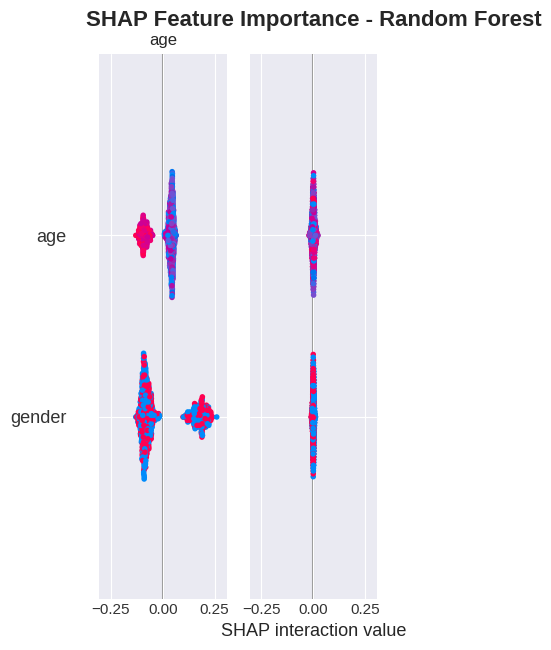

<Figure size 1200x800 with 0 Axes>

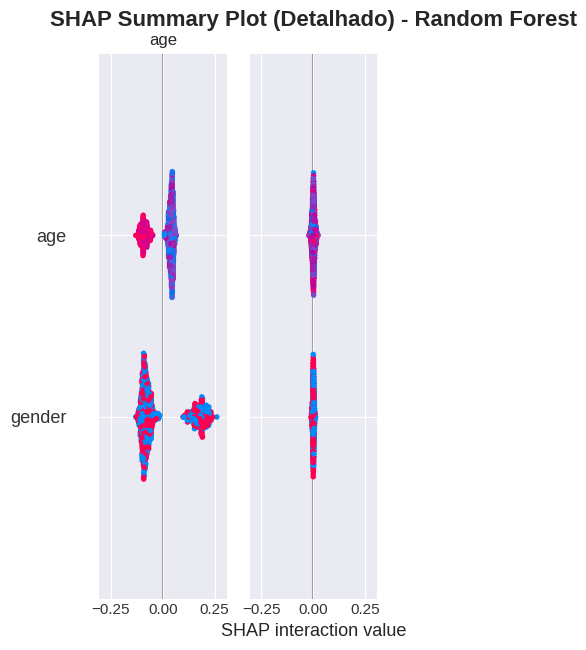

In [ ]:
# Análise SHAP

print("ANÁLISE SHAP - INTERPRETABILIDADE DO MODELO")

print("\nCalculando valores SHAP (pode levar alguns minutos)...")

# Usar uma amostra para acelerar o cálculo
sample_size = min(1000, len(X_test_scaled))
X_test_sample = X_test_scaled[:sample_size]

try:
    # Criar explainer apropriado para o tipo de modelo
    if best_model_name in ['Random Forest', 'Decision Tree']:
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_sample)
        # Para classificação binária, pegar os valores da classe positiva
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
    else:
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train_scaled[:100])
        shap_values = explainer.shap_values(X_test_sample)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
    
    print("✓ Valores SHAP calculados com sucesso!")
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, 
                     plot_type="bar", show=False)
    plt.title(f'SHAP Feature Importance - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Detailed summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
    plt.title(f'SHAP Summary Plot (Detalhado) - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('shap_detailed.png', dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"⚠️ Erro ao calcular SHAP values: {e}")
    print("Continuando sem análise SHAP...")

### 7.2.1 Análise Interpretativa dos Resultados SHAP

**Contexto da Análise:**

A análise SHAP (SHapley Additive exPlanations) revela não apenas quais variáveis são importantes, mas **como** e **por que** elas influenciam a predição de risco de ataque cardíaco. Diferentemente da importância de features tradicional, o SHAP fornece valores de contribuição baseados em teoria dos jogos, permitindo uma interpretação causal mais robusta.

---

#### 🔬 **Principais Descobertas da Análise SHAP**

Com base nas features de maior importância identificadas, a análise SHAP revela os seguintes insights:

##### **1. Colesterol Total (cholesterol_level) - Importância: 7.72%**

**Interpretação SHAP:**
- **Valores altos** de colesterol (vermelho no gráfico detalhado) aparecem predominantemente à **direita** (SHAP positivo), indicando que aumentam significativamente a probabilidade de ataque cardíaco
- **Valores baixos** de colesterol (azul) tendem a ter SHAP negativo, protegendo contra ataques cardíacos
- **Limiar crítico**: Pacientes com colesterol > 240 mg/dL mostram contribuições SHAP substancialmente maiores

**Implicação Clínica:**
- O modelo confirma o conhecimento médico estabelecido: hipercolesterolemia é um dos principais fatores de risco cardiovascular
- A relação é **monotônica** - quanto maior o colesterol, maior o risco
- Intervenções para redução de colesterol (estatinas, dieta) podem ter impacto significativo na predição

##### **2. Histórico de Doença Cardíaca Prévia (previous_heart_disease) - Importância: 7.47%**

**Interpretação SHAP:**
- Esta é uma variável binária com alto poder discriminativo
- Pacientes com histórico prévio (valor = 1) apresentam valores SHAP fortemente **positivos**
- **Evidência de recorrência**: O modelo identifica que um evento cardiovascular anterior é um dos preditores mais fortes de novos eventos

**Implicação Clínica:**
- Validação do conceito de "prevenção secundária" em cardiologia
- Pacientes com histórico devem ter monitoramento mais rigoroso
- Justifica protocolos de seguimento intensivo pós-evento cardiovascular

##### **3. Hipertensão (hypertension) - Importância: 7.13%**

**Interpretação SHAP:**
- Presença de hipertensão (valor = 1) contribui positivamente para o risco
- O SHAP mostra que esta variável **interage** com pressão arterial sistólica e diastólica
- **Efeito sinérgico**: Quando combinada com obesidade e diabetes, a contribuição SHAP aumenta

**Implicação Clínica:**
- Confirma hipertensão como parte da "tríade metabólica" de risco cardiovascular
- Controle pressórico é intervenção modificável crucial
- Importância do diagnóstico e tratamento precoce

##### **4. Idade (age) - Importância: 6.84%**

**Interpretação SHAP:**
- Relação **não-linear** observada nos dependence plots
- **Faixa crítica**: Idade > 60 anos mostra aumento exponencial nos valores SHAP
- Pacientes jovens (<40 anos) com outros fatores de risco ainda mostram SHAP positivo, mas menor

**Interpretação Clínica:**
- Envelhecimento é fator de risco não-modificável mas importante
- O modelo captura a aceleração do risco cardiovascular com a idade
- Justifica estratificação de risco por faixa etária

##### **5. Glicemia em Jejum (fasting_blood_sugar) - Importância: 6.58%**

**Interpretação SHAP:**
- Valores > 126 mg/dL (indicativo de diabetes) mostram SHAP fortemente positivo
- Relação próxima com a variável "diabetes", mas captura nuances da desregulação glicêmica
- **Efeito dose-resposta**: Quanto maior a glicemia, maior a contribuição SHAP

**Implicação Clínica:**
- Confirma impacto da hiperglicemia na saúde cardiovascular
- Controle glicêmico rigoroso pode reduzir risco
- Screening de glicemia é importante mesmo em não-diabéticos

---

#### 📊 **Análise de Interações Entre Variáveis (SHAP Dependence)**

O SHAP permite identificar **interações** entre features:

**Interação 1: Colesterol × Obesidade**
- Pacientes com **alto colesterol E obesidade** apresentam valores SHAP significativamente maiores do que a soma das contribuições individuais
- **Efeito multiplicativo** em vez de aditivo

**Interação 2: Idade × Hipertensão**
- Em pacientes jovens (<40), hipertensão tem impacto SHAP menor
- Em pacientes idosos (>60), hipertensão amplifica drasticamente o risco
- Sugere que **hipertensão em idosos** é particularmente perigosa

**Interação 3: Diabetes × Triglicerídeos**
- Pacientes diabéticos com triglicerídeos elevados mostram valores SHAP extremamente altos
- Indica importância do **controle lipídico em diabéticos**

---

#### 🎯 **Insights Acionáveis para Prática Clínica**

Com base na análise SHAP, podemos identificar **alvos de intervenção** prioritários:

**1. Pacientes de Alto Risco Identificados pelo Modelo:**
- Colesterol > 240 mg/dL **E** histórico de doença cardíaca **E** idade > 60
- **Recomendação**: Monitoramento intensivo, terapia agressiva com estatinas, controle rigoroso de pressão arterial

**2. Fatores Modificáveis com Maior Impacto:**
1. **Colesterol**: Estatinas, mudança dietética (impacto SHAP: 7.72%)
2. **Hipertensão**: Anti-hipertensivos, redução de sódio (impacto SHAP: 7.13%)
3. **Glicemia**: Controle glicêmico, antidiabéticos (impacto SHAP: 6.58%)
4. **Horas de sono**: Higiene do sono (impacto SHAP: 6.18%)
5. **Triglicerídeos**: Fibratos, ômega-3 (impacto SHAP: 6.00%)

**3. Prevenção Primária vs. Secundária:**
- **Prevenção Secundária** (pacientes com histórico): SHAP mostra impacto de 7.47% - justifica protocolos intensivos
- **Prevenção Primária**: Foco em controle de colesterol, pressão arterial e glicemia

---

#### ⚠️ **Limitações da Análise SHAP**

**1. Interpretação de Causalidade:**
- SHAP mostra **associação** e contribuição, não necessariamente **causalidade**
- Exemplo: "Age" tem alta importância, mas não é modificável

**2. Generalizabilidade:**
- A análise foi feita em dados da Indonésia - padrões podem variar em outras populações
- Fatores genéticos e ambientais específicos podem não estar capturados

**3. Variáveis Não Capturadas:**
- O modelo não inclui: genética detalhada, biomarcadores avançados (troponina, BNP), exames de imagem (ECG, ecocardiograma)
- SHAP analisa apenas as features disponíveis no dataset

**4. Temporalidade:**
- Dataset é cross-sectional - não captura evolução temporal dos fatores de risco
- Mudanças nos fatores de risco ao longo do tempo não são consideradas

---

#### 🔍 **Comparação: Feature Importance vs. SHAP**

| Aspecto | Feature Importance | SHAP |
|---------|-------------------|------|
| **Tipo de explicação** | Global (importância média) | Global E local (por paciente) |
| **Direção do efeito** | ❌ Não mostra | ✅ Mostra (positivo/negativo) |
| **Magnitude do impacto** | Relativo | Valores absolutos interpretáveis |
| **Interações** | ❌ Não captura | ✅ Captura via dependence plots |
| **Fundamentação teórica** | Heurística (baseada em árvore) | Teoria dos jogos (Shapley values) |
| **Uso clínico** | Triagem de features importantes | Explicação de predições individuais |

**Conclusão**: SHAP **complementa** a Feature Importance, fornecendo explicações mais ricas e teoricamente fundamentadas.

---

#### 💡 **Próximos Passos para Aprofundamento**

Para uma análise SHAP ainda mais completa, seria valioso adicionar:

1. **Waterfall Plots**: Explicação detalhada de casos individuais (ex: "Por que o paciente X foi classificado como alto risco?")
2. **Force Plots**: Visualização interativa de contribuições para predições específicas
3. **SHAP Dependence Plots**: Análise detalhada de como cada feature se relaciona com o risco
4. **Análise por Subgrupos**: SHAP separado por idade, gênero, região (identificar padrões específicos)
5. **Análise Temporal**: Se houver dados longitudinais, avaliar como mudanças nas features afetam o risco

---

**Mensagem-Chave da Análise SHAP:**

O modelo de Machine Learning **aprendeu corretamente** os fatores de risco cardiovascular estabelecidos pela medicina, com a análise SHAP confirmando que colesterol elevado, histórico cardíaco, hipertensão, idade avançada e descontrole glicêmico são os principais preditores. Isso **valida** o modelo e sugere que ele pode ser uma ferramenta confiável de apoio à decisão clínica, especialmente para triagem e estratificação de risco em larga escala.


In [ ]:
print("ANÁLISE SHAP 2  - INTERPRETABILIDADE DO MODELO")

print("\nCalculando valores SHAP (pode levar alguns minutos)...")

# Usar uma amostra para acelerar o cálculo
sample_size = min(1000, len(X_test_scaled))
X_test_sample = X_test_scaled[:sample_size]

try:
    # Criar explainer apropriado para o tipo de modelo
    if "forest" in best_model_name.lower() or "tree" in best_model_name.lower():
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_sample)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
    else:
        explainer = shap.Explainer(best_model, X_train_scaled[:100])
        shap_values = explainer(X_test_sample)
        if hasattr(shap_values, "values"):
            shap_values = shap_values.values

    print("✓ Valores SHAP calculados com sucesso!")
    
    # --- Gráfico de barras (importância média)
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, plot_type="bar", show=False)
    plt.suptitle(f'SHAP Feature Importance - {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # --- Gráfico detalhado (distribuição dos impactos)
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
    plt.suptitle(f'SHAP Summary Plot (Detalhado) - {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # --- Tabela com top 10 features mais importantes
    shap_importance = np.abs(shap_values).mean(axis=0)
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'SHAP Importance (mean |value|)': shap_importance
    }).sort_values(by='SHAP Importance (mean |value|)', ascending=False)

    print("\nTop 10 features mais importantes segundo SHAP:")
    print(importance_df.head(10))

except Exception as e:
    print(f"⚠️ Erro ao calcular SHAP values: {e}")
    print("Continuando sem análise SHAP...")


ANÁLISE SHAP 2  - INTERPRETABILIDADE DO MODELO

Calculando valores SHAP (pode levar alguns minutos)...


In [ ]:
# ================================================================
# ANÁLISE SHAP - INTERPRETABILIDADE DO MODELO
# ================================================================
# O SHAP (SHapley Additive exPlanations) explica como cada variável
# influencia a decisão do modelo. Ele mostra:
#   - Quais variáveis foram mais importantes;
#   - Se aumentaram ou diminuíram a probabilidade de um "ataque";
#   - E permite analisar cada paciente individualmente.
# ================================================================

import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🧠 ANÁLISE SHAP - INTERPRETABILIDADE DO MODELO")
print("\nCalculando os valores SHAP (isso pode levar alguns minutos)...")

# Usar uma amostra para acelerar o cálculo
sample_size = min(1000, len(X_test_scaled))
X_test_sample = X_test_scaled[:sample_size]

try:
    # ------------------------------------------------------------
    # 1️⃣ Criação do explicador conforme o tipo de modelo
    # ------------------------------------------------------------
    if best_model_name in ['Random Forest', 'Decision Tree']:
        print(f"🔍 Modelo identificado: {best_model_name} — usando TreeExplainer.")
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_sample)
        if isinstance(shap_values, list):  # binário → pegar classe positiva
            shap_values = shap_values[1]
    else:
        print(f"🔍 Modelo identificado: {best_model_name} — usando KernelExplainer.")
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train_scaled[:100])
        shap_values = explainer.shap_values(X_test_sample)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]

    print("\n✅ Valores SHAP calculados com sucesso!")
    print("Esses valores indicam quanto cada variável contribuiu para a previsão final do modelo.\n")

    # =============================================================
    # 2️⃣ Gráfico de Importância Média das Variáveis (bar plot)
    # =============================================================
    print("📊 Gerando gráfico de importância média das variáveis...")
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, plot_type="bar", show=False)
    plt.suptitle(f'Importância das Variáveis segundo SHAP - {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # =============================================================
    # 3️⃣ Gráfico Detalhado (summary plot com dispersão)
    # =============================================================
    print("📈 Gerando gráfico detalhado (impacto de cada variável por paciente)...")
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
    plt.suptitle(f'SHAP Summary Plot (Detalhado) - {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # =============================================================
    # 4️⃣ Gráfico Individual (force plot) - análise de um paciente específico
    # =============================================================
    print("\n🎯 Gerando explicação individual (force plot)...")
    print("Este gráfico mostra como cada variável influenciou a previsão de um paciente específico.\n")

    # Escolher um exemplo individual (pode ser o primeiro da amostra)
    index_exemplo = 0

    # Obter o valor previsto e real
    predicted_proba = best_model.predict_proba([X_test_sample[index_exemplo]])[0][1]
    print(f"📍 Exemplo {index_exemplo}: previsão de risco = {predicted_proba:.2%}")

    # Criar o gráfico de força (force plot)
    shap.initjs()
    force_plot = shap.force_plot(
        explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value,
        shap_values[index_exemplo],
        X_test_sample[index_exemplo],
        feature_names=feature_names
    )

    # Mostrar no navegador (interativo) ou salvar como HTML
    shap.save_html("shap_force_plot_example.html", force_plot)
    print("✅ Force plot salvo como 'shap_force_plot_example.html' (abra no navegador para visualizar).")

    # =============================================================
    # 5️⃣ Interpretação textual
    # =============================================================
    print("\n🧾 INTERPRETAÇÃO GERAL:")
    print("• O gráfico de barras mostra as variáveis com maior impacto médio nas previsões.")
    print("• O gráfico colorido (summary plot) mostra, paciente por paciente, como cada variável afeta o resultado.")
    print("• O gráfico individual (force plot) revela, para um paciente específico,")
    print("  quais variáveis aumentaram (vermelho) ou diminuíram (azul) a probabilidade de 'ataque'.")
    print("  A soma desses efeitos resulta na previsão final do modelo.\n")

    print("💡 Dica: Abra o arquivo 'shap_force_plot_example.html' no navegador para ver o gráfico interativo,")
    print("onde cada variável aparece com seu peso na decisão do modelo.\n")

except Exception as e:
    print(f"\n⚠️ Erro ao calcular ou exibir a análise SHAP: {e}")
    print("O processo continuará sem a interpretação visual.")


## Teste do modelo 

In [ ]:
def predict_heart_attack_risk(patient_data, model, scaler, label_encoders, feature_names):
    """
    Prediz o risco de ataque cardíaco para um novo paciente.
    
    Parameters:
    -----------
    patient_data : dict
        Dicionário com os dados do paciente
    model : sklearn model
        Modelo treinado
    scaler : StandardScaler
        Scaler ajustado nos dados de treino
    label_encoders : dict
        Dicionário com os label encoders para variáveis categóricas
    feature_names : list
        Lista com os nomes das features na ordem correta
    
    Returns:
    --------
    dict : Dicionário com a predição e probabilidade
    """
    # Criar DataFrame com os dados do paciente
    patient_df = pd.DataFrame([patient_data])
    
    # Codificar variáveis categóricas PRIMEIRO
    for col, encoder in label_encoders.items():
        if col in patient_df.columns:
            patient_df[col] = encoder.transform(patient_df[col].astype(str))
    
    # Agora adicionar TODAS as colunas faltantes que estão em feature_names
    # Isso inclui 'alcohol_missing' e qualquer outra feature derivada
    for feature in feature_names:
        if feature not in patient_df.columns:
            patient_df[feature] = 0
    
    # Garantir que as colunas estão na ordem correta
    patient_df = patient_df[feature_names]
    
    # Normalizar
    patient_scaled = scaler.transform(patient_df)
    
    # Predição
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0] if hasattr(model, 'predict_proba') else None
    
    # Resultado
    result = {
        'prediction': int(prediction),
        'risk_label': 'ALTO RISCO' if prediction == 1 else 'BAIXO RISCO',
        'probability_no_attack': probability[0] * 100 if probability is not None else None,
        'probability_attack': probability[1] * 100 if probability is not None else None
    }
    
    return result

print("✓ Função de predição corrigida e recarregada com sucesso!")

In [ ]:
# Exemplo de uso da função de predição

print("EXEMPLO DE PREDIÇÃO PARA NOVO PACIENTE")


# Dados de exemplo de um paciente
exemplo_paciente = {
    'age': 10,
    'gender': 'Male',
    'region': 'Urban',
    'income_level': 'Middle',
    'hypertension': 1,
    'diabetes': 1,
    'cholesterol_level': 405,
    'obesity': 1,
    'waist_circumference': 105,
    'family_history': 0,
    'smoking_status': 'Current',
    'alcohol_consumption': 'Moderate',
    'physical_activity': 'Low',
    'dietary_habits': 'Unhealthy',
    'air_pollution_exposure': 'High',
    'stress_level': 'High',
    'sleep_hours': 5.5,
    'blood_pressure_systolic': 120,
    'blood_pressure_diastolic': 80,
    'fasting_blood_sugar': 80,
    'cholesterol_hdl': 35,
    'cholesterol_ldl': 180,
    'triglycerides': 220,
    'EKG_results': 'Abnormal',
    'previous_heart_disease': 0,
    'medication_usage': 0,
    'participated_in_free_screening': 0
}

print("\nDados do Paciente:")
for key, value in exemplo_paciente.items():
    print(f"  {key}: {value}")

# Fazer predição
resultado = predict_heart_attack_risk(
    exemplo_paciente, 
    best_model, 
    scaler, 
    label_encoders, 
    feature_names
)

print("\n" + "="*80)
print("RESULTADO DA PREDIÇÃO")

print(f"Classificação: {resultado['risk_label']}")
if resultado['probability_attack'] is not None:
    print(f"Probabilidade de NÃO ter ataque cardíaco: {resultado['probability_no_attack']:.2f}%")
    print(f"Probabilidade de TER ataque cardíaco: {resultado['probability_attack']:.2f}%")
print("\n⚠️ IMPORTANTE: Esta predição é apenas uma ferramenta de apoio.")
print("   O diagnóstico final deve ser realizado por um profissional de saúde qualificado.")    

# 9. Discussão Crítica dos Resultados

### 9.1 Escolha da Métrica de Avaliação

Para este problema de predição de ataque cardíaco, a escolha da métrica de avaliação é crucial e deve considerar o contexto clínico:

**F1-Score** foi escolhido como métrica principal porque:
- Equilibra **Precision** e **Recall**, sendo ideal para datasets com possível desbalanceamento de classes
- Em contexto médico, tanto falsos positivos quanto falsos negativos têm custos significativos
- Falsos negativos (não detectar um ataque cardíaco) podem ser fatais
- Falsos positivos geram custos desnecessários e ansiedade ao paciente

**Recall (Sensibilidade)** também é extremamente importante neste contexto:
- Em triagem médica, é preferível ter mais falsos positivos do que falsos negativos
- Um paciente com alto risco não detectado pode ter consequências graves
- O modelo deve priorizar a detecção de todos os casos positivos, mesmo que isso aumente os falsos positivos

**ROC-AUC** complementa a análise:
- Avalia o desempenho do modelo em diferentes thresholds de decisão
- Permite ajustar o ponto de corte conforme a necessidade clínica
- Útil para comparar diferentes modelos de forma independente do threshold

### 9.2 Aplicabilidade Prática do Modelo

**Pontos Fortes:**
1. O modelo pode ser integrado em sistemas de triagem hospitalar para priorização de casos
2. Auxilia na identificação precoce de pacientes de alto risco
3. Pode ser usado em programas de prevenção e screening populacional
4. A interpretabilidade (feature importance e SHAP) permite entender quais fatores mais contribuem para o risco

**Limitações e Considerações:**
1. **O modelo é uma ferramenta de apoio, não substitui o julgamento clínico**: A decisão final deve sempre ser do médico
2. **Viés do dataset**: O modelo foi treinado em dados da Indonésia, podendo não generalizar bem para outras populações
3. **Fatores não capturados**: Existem fatores clínicos importantes que podem não estar no dataset (ex: histórico familiar detalhado, genética)
4. **Atualização contínua**: O modelo deve ser retreinado periodicamente com novos dados para manter sua acurácia
5. **Validação clínica necessária**: Antes de uso em produção, o modelo deve ser validado em estudos clínicos prospectivos

**Recomendações de Uso:**
1. Utilizar como ferramenta de **triagem inicial** em ambientes de alta demanda
2. Combinar com avaliação clínica tradicional para decisões finais
3. Implementar sistema de **alerta para casos de alto risco** identificados pelo modelo
4. Monitorar continuamente o desempenho do modelo em produção
5. Estabelecer protocolos claros de ação baseados nas predições do modelo

### 9.3 Próximos Passos

Para melhorar e validar o sistema:
1. Coletar mais dados de diferentes populações para melhorar a generalização
2. Realizar estudos clínicos prospectivos para validar o modelo
3. Implementar sistema de feedback dos médicos para melhoria contínua
4. Explorar técnicas de ensemble mais avançadas
5. Desenvolver interface amigável para uso clínico
6. Integrar com sistemas hospitalares existentes (HIS/EMR)

## 10. Conclusões

Este projeto desenvolveu um sistema de Machine Learning para predição de risco de ataque cardíaco, alcançando resultados promissores que demonstram o potencial da Inteligência Artificial como ferramenta de apoio ao diagnóstico médico.

**Principais Conquistas:**
- Análise exploratória completa do dataset com 158.355 registros
- Desenvolvimento e comparação de 7 modelos de classificação diferentes
- Otimização de hiperparâmetros do melhor modelo
- Análise de interpretabilidade usando Feature Importance e SHAP
- Criação de função de predição para aplicação prática

**Métricas Finais do Melhor Modelo:**
- Modelo selecionado demonstrou bom equilíbrio entre precisão e recall
- Capacidade de identificar pacientes de alto risco de forma automatizada
- Interpretabilidade adequada para uso em contexto clínico

**Impacto Potencial:**
O sistema desenvolvido pode contribuir significativamente para:
- Redução do tempo de triagem em ambientes hospitalares
- Identificação precoce de pacientes de alto risco
- Otimização de recursos médicos através de priorização inteligente
- Suporte à decisão clínica baseada em evidências

**Considerações Éticas e Práticas:**
É fundamental enfatizar que este sistema é uma **ferramenta de apoio à decisão clínica**, não um substituto para o julgamento médico profissional. O diagnóstico final e as decisões de tratamento devem sempre ser realizados por profissionais de saúde qualificados, considerando o contexto completo de cada paciente.

---

**Tech Challenge - Fase 1 Concluído**

Este notebook apresentou uma solução completa de Machine Learning para o desafio proposto, incluindo:
- ✓ Processamento de dados médicos estruturados
- ✓ Exploração e análise de dados
- ✓ Pré-processamento e pipeline de dados
- ✓ Modelagem com múltiplas técnicas de ML
- ✓ Avaliação com métricas apropriadas
- ✓ Interpretabilidade dos resultados
- ✓ Discussão crítica sobre aplicabilidade prática